<a href="https://colab.research.google.com/github/AvChilds/mastersML/blob/main/masters_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🏡 **CFG +Masters Project: Serviced Accommodation in Essex - Analysis and Prediction**

##**1. Introduction**
This project dives into the world of **Serviced accommodation listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data.


### **1.1. Project Objective**

A holiday lettings company is on the lookout for promising properties across Essex to either purchase or rent (i.e rent-to-rent). They are seeking data insights to select properties that can earn the highest income.

The aims of this project are:
1. **Phase 1:** Identify the features that mostly correlates with occupancy rates and annual revenue

2. **Phase 2:** Build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential.

### **1.2. The Data**

The data is retrieved from real data acquired from PriceLabs (https://www.pricelabs.co), a subscription-based database often used by property investors that provides professionally managed datasets for existing and potential serviced accommodation businesses.

### **1.3. Phase 1 : Data Wrangling and Exploratory Data Analysis**

This first phase analysis will focus on the following:
- **Exploratory Data Analysis and Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Merging datasets, Encoding and transforming columns as needed.
- **Target vs Feature Analysis**: Correlational study will be conducted according to the data type (ie. continuous/discrete numerical vs binary/categorical).


### **1.4. Features of the Study**

- **Host features** eg. Number of reviews, Ratings, professionally managed
- **Property Details** eg. Property economic type, number of bedrooms and bathrooms, number of occupants, maximum number of guests
- **Amenities** eg. beachfront, hot-tub, EV-charger, pool, pets allowed, smoking allowed
- **Listing features** eg. Minimum length of stays, active days, blocked days


### **1.5. Definitions**

####Feature variables

| **Category** | **Feature**         | **Description**                                         | **Data Type**          |
|--------------|---------------------|---------------------------------------------------------|------------------------|
| Property     | Number of Bedrooms  | Total number of bedrooms in the property                | Discrete Numerical     |
|              | Number of Bathrooms | Total number of bathrooms in the property               | Discrete Numerical     |
|              | Number of Guests    | Maximum number of guests allowed                        | Discrete Numerical     |
|              | Location            | Town in Essex where the property is located             | Categorical            |
| Host         | Host Ratings        | Average rating of the host                              | Continuous Numerical   |
|              | Number of Reviews   | Total number of reviews received                        | Discrete Numerical     |
| Amenities    | Beachfront            | Whether the property is near the sea                    | Binary Categorical     |
|              | Hot Tub             | Availability of a hot tub                               | Binary Categorical     |
|              | Pets Allowed        | Whether pets are permitted                              | Binary Categorical     |
|              | Smoking Allowed     | Whether smoking is permitted                            | Binary Categorical     |
| Listing      | Length of Stay      | Minimum or maximum nights per stay                      | Discrete Numerical     |
|              | Active Days         | Days the listing is live and bookable                   | Discrete Numerical     |
|              | Blocked Days        | Days the listing is unavailable                         | Discrete Numerical     |
|              | Price               | Nightly price of the listing                            | Continuous Numerical   |
|              | Average Daily Rate  | How much a listing makes on average per day             | Continuous Numerical   |

#### Target Variables

| **Variable**       | **Description**                                                       | **Data Type**          |
|--------------------|-----------------------------------------------------------------------|------------------------|
| Annual Revenue      | Total income generated per listing annually                          | Continuous Numerical   |
| Occupancy Rate      | % of booked days out of total active days (Booked ÷ Active × 100)    | Continuous Numerical   |


## **Phase 1: Data Wrangling and Exploratory Data Analysis**

## **2. Module Requirements and Imports**

### **2.1 Import Python Modules**

In [43]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

### **2.2 Import and Merge Data Files**
There are 2 data files to import, one contains listing of 2-bed properties, and the other, 3-bed properties.

In [45]:
# import data files
airbnb_2bed = pd.read_csv("airbnb_essex_2bed.csv")   # please check and use your local file path
airbnb_2bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,...,3,3.0,1,No,No,No,Yes,No,No,No


In [46]:
airbnb_3bed= pd.read_csv("airbnb_essex_3bed.csv")  # please check and use your local file path
airbnb_3bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-Sea,0,NaN,0,151,NaN,NaN,NaN,5,...,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-Sea,0,NaN,0,138,NaN,NaN,NaN,14,...,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-Sea,0,NaN,0,101,NaN,NaN,NaN,1,...,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-Sea,0,NaN,0,187,NaN,NaN,NaN,3,...,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-Sea,0,NaN,0,78,NaN,NaN,High,1,...,63,NaN,0,No,No,No,Yes,No,No,No


In [47]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [48]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

*Both datasets have a 26 columns of features (i.e not including the listing IDs) which are identical.  12 of these are contain string values, the rest are numeric columns.*

In [49]:
#Combining both datasets to create one datafram: as there are the same columns, the datasets can be concatetenated.

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data.

## **3. Data Exploration and Cleaning**

### **3.1. Column standardisation**

In [50]:
#Checking columns of the dataset
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [51]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [52]:
#renaming of columns for readability

data.rename(columns = {'est_rental_revenue_median': 'year_revenue', 'estimated_adr':'avg_daily_rate', 'est_adj_occupancy':'occupancy'}, inplace=True)

In [53]:
#checking change in column names
print(f"Columns in dataset :{data.columns.values}")

Columns in dataset :['listing_id' 'town' 'year_revenue' 'avg_daily_rate' 'occupancy'
 'active_days' 'booking_window' 'length_of_stay' 'dynamic_pricing'
 'min_stay' 'management' 'bedrooms' 'bathrooms' 'max_guests'
 'listed_price' 'is_active' 'economic_category' 'blocked_days' 'rating'
 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger' 'kitchen' 'pool'
 'pets_allowed' 'smoking_allowed']


### **3.2. Managing Duplicates**

Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neighbourhoods.


In [54]:
# Exploring duplicates
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,year_revenue,avg_daily_rate,occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,...,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,...,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,...,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,...,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,...,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,...,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,...,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,...,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,...,14,5.00,23,No,No,Yes,Yes,No,No,No


In [55]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [56]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

There are now a total of 1236 rows of data

### **3.3. Feature Relevance**

One of the primary use of PriceLabs data is for agents and airbnb owners to determine listing prices. The columns (features) "booking_window" and "dynamic_pricing" are used to determine listing prices, and not our target outcome variables of  revenue or occupancy.  They are therefore is not relevant to our analysis. These columns/ features are excluded from our study.

In [59]:
data.drop(columns=['listing_id','booking_window','dynamic_pricing'],inplace=True )

KeyError: "['listing_id', 'booking_window', 'dynamic_pricing'] not found in axis"

### **3.4 Exploring and Managing Missing and Zero Values**

<Axes: title={'center': 'Heatmap of Missing Values'}>

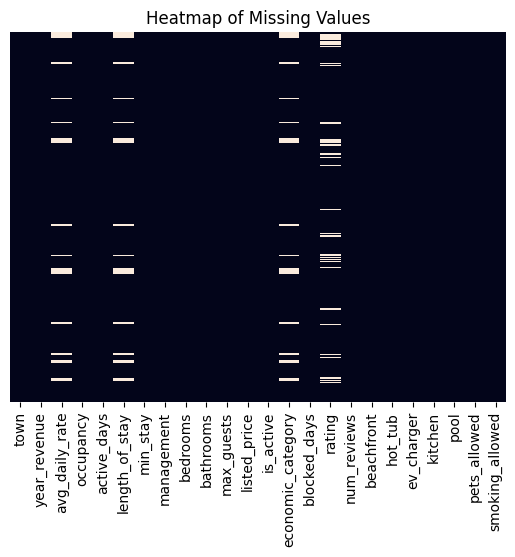

In [60]:
#Analysing patterns and distributions of missing values in the data using a heatmap
plt.title('Heatmap of Missing Values')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [61]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
avg_daily_rate       110
length_of_stay       110
economic_category    110
rating               144
dtype: int64


The main columns with missing values are "avg_daily_rate", "length_of_stay", "economic_category" and "rating".  

It also appears that there are exactly the same number of missing values (110) for 3 columns - avg_daily_rate, length_of_stay and economic_category, appearing along the same rows (listings).

In [62]:
# analysing these rows further, checking the values for target variables occupancy and annual revenue

mask = data[['avg_daily_rate', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [63]:
data[mask][['occupancy', 'year_revenue']].describe()

,occupancy,year_revenue
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be excluded from the study.

#### **Managing Zero Revenue**

In [64]:
#exploring zero values for target variable
data[(data['year_revenue'] == 0)]

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,Grays,0,NaN,0,42,NaN,3,Small,2,2.0,...,11,NaN,0,No,No,No,Yes,No,No,No
1,Grays,0,NaN,0,25,NaN,1,Small,2,2.0,...,25,5.0,1,No,No,No,Yes,No,No,No
2,Grays,0,NaN,0,314,NaN,3,Individual,2,2.5,...,52,4.0,1,No,No,No,Yes,No,No,No
3,Grays,0,NaN,0,83,NaN,1,Individual,2,1.0,...,0,NaN,0,No,No,No,Yes,No,No,No
4,Grays,0,NaN,0,363,NaN,4,Small,2,1.5,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Grays,0,NaN,0,94,NaN,1,Small,3,3.0,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,Grays,0,NaN,0,52,NaN,1,Large,3,1.0,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,Grays,0,NaN,0,183,NaN,3,Large,3,1.5,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,Grays,0,NaN,0,127,NaN,3,Large,3,2.0,...,187,4.5,0,No,No,No,Yes,No,No,No


In [65]:
# selecting rows where revenue is not equals to 0.
data = data[data['year_revenue'] != 0]
data.head(5)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.00,0,No,No,No,Yes,No,No,No
21,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,3,NaN,0,No,No,No,Yes,No,Yes,No
22,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,96,4.42,0,No,No,No,Yes,No,No,No
23,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,43,5.00,4,No,No,No,Yes,No,No,No
24,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,58,NaN,0,No,No,No,Yes,No,No,No


In [66]:
#checking for other anomalies
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1029.000000,1126.000000
mean,14183.282416,111.085444,58.397869,219.482238,11.089698,3.057726,2.351687,1.431616,5.022202,136.517762,67.636767,4.583703,26.719361
std,11384.073480,50.895556,26.713322,98.945584,8.887841,5.232144,0.477709,0.562324,1.349385,65.237925,64.608389,0.876289,48.672669
min,66.000000,24.570000,0.000000,17.000000,1.000000,1.000000,2.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000
25%,5385.250000,82.625000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.250000,16.000000,4.610000,2.000000
50%,11957.000000,101.125000,63.000000,229.500000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19980.750000,125.387500,79.000000,310.000000,15.750000,3.000000,3.000000,2.000000,6.000000,154.750000,102.000000,5.000000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


#### **Managing Zero Occupancy**

In [67]:
#looking for zero values in occupancy

occupancy_zero = data[data['occupancy'] == 0]
occupancy_zero

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.0,0,No,No,No,Yes,No,No,No
1199,Clacton-on-Sea,89,88.83,0,256,1.0,2,Individual,3,1.5,...,110,0.0,0,No,No,No,Yes,Yes,Yes,Yes


There is only 2 rows showing 0 occupancy rate. Both also have **ratings** of zero which may suggest either data anomaly, or these are newly listed properties without historical data. These rows will be removed.

In [68]:
data = data[data['occupancy'] != 0].copy()

#### **Managing Zero Ratings and Number of Reviews**

In [69]:
# checking for missing values
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with missing values is the 'Rating' column with 97 missing values.

In [70]:
#Checking Ratings = 0

zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
40,Grays,2620,58.23,68,66,17.0,2,Unknown,2,1.0,...,58,0.0,0,No,No,No,Yes,No,Yes,No
57,Grays,8163,74.21,97,113,18.0,10,Individual,2,2.0,...,253,0.0,0,No,No,No,Yes,No,No,No
71,Grays,11990,92.94,53,242,4.0,2,Small,2,1.0,...,60,0.0,0,No,No,No,Yes,No,No,No
108,Southend-on-Sea,700,116.64,2,359,1.0,1,Individual,2,1.0,...,7,0.0,0,No,No,No,Yes,No,No,No
110,Southend-on-Sea,811,135.19,5,111,18.0,3,Small,2,1.0,...,9,0.0,0,No,No,No,Yes,No,No,No
112,Southend-on-Sea,1471,98.10,5,294,2.0,1,Small,2,1.0,...,72,0.0,0,No,Yes,No,Yes,No,No,No
136,Southend-on-Sea,4651,35.78,55,237,5.0,1,Individual,2,1.0,...,129,0.0,0,No,No,No,Yes,No,No,No
251,Chelmsford,4211,100.27,44,95,36.0,3,Individual,2,1.0,...,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,Chelmsford,19583,264.64,95,78,2.0,5,Small,2,1.0,...,288,0.0,0,No,No,No,Yes,No,No,No
349,Brentwood,6460,86.13,90,83,12.0,7,Individual,2,1.0,...,155,0.0,0,No,No,No,Yes,No,Yes,No


There are 23 rows where ratings = 0.

It appears that despite some properties have had successful listings and generating revenue, ratings and number of reviews remain zero. This points to possible anomaly or a default value of zero for missing values in these columns. This will need to be managed.

In [71]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [72]:
# replacing problematic values for 'rating'

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [73]:
#calculating median, and replacing NaNs and zeros with the median rating
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [74]:
#checking if this has resolved zero rating
zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [75]:
# replacing problematic values for 'rating'

valid_num_reviews = data["num_reviews"][(data["num_reviews"] >= 1)]

In [76]:
#calculating median, and replacing NaNs and zeros with the median rating
median_reviews=valid_num_reviews.median()
data["num_reviews"] = data["num_reviews"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)

In [77]:
#checking if this has resolved zero rating
zero_rating= data[data['num_reviews'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


#### **Checking outcome of cleaning missing values**

<Axes: title={'center': 'Missing Values (after data cleaning)'}>

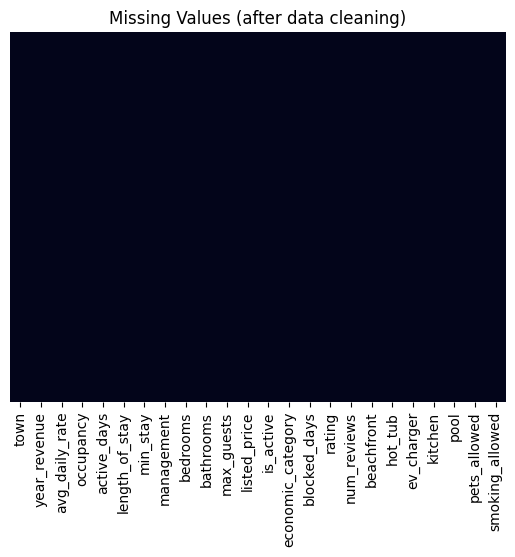

In [78]:
#checking effectiveness of removing null values in the dataset.
plt.title('Missing Values (after data cleaning)')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

Checking missing values on the dataset using a heatmap - shows that there are no longer missing/NaN values in the dataset.

#### **Zero Values - Bathroom**

In [79]:
zero_bathroom= data[data['bathrooms'] == 0]
zero_bathroom

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
259,Chelmsford,7969,122.60,31,213,9.0,1,Individual,2,0.0,...,153,4.96,24.0,No,No,No,Yes,No,No,No
391,Brentwood,27524,108.36,71,359,19.0,1,Small,2,0.0,...,7,4.64,42.0,No,No,No,Yes,No,No,No
468,Colchester,7011,56.09,60,208,22.0,2,Small,2,0.0,...,78,5.00,4.0,No,No,Yes,Yes,No,No,No
1212,Clacton-on-Sea,2952,105.43,13,212,4.0,2,Individual,3,0.0,...,145,4.57,7.0,No,No,No,Yes,No,Yes,No


There are 4 row with 0 bathrooms

In [80]:
print(data['bathrooms'].value_counts())

bathrooms
1.0    603
2.0    248
1.5    180
2.5     60
3.0     25
0.0      4
4.0      3
3.5      1
Name: count, dtype: int64


As there are only 4 listings without bathrooms, we have decided to use the mode (most frequently occuring value) to replace the zero values as it is assumed that these properties are most likely to have this number of bathrooms.

In [81]:
bathroom_mode = data['bathrooms'].mode()[0]
print("Mode of bathrooms:", bathroom_mode)

Mode of bathrooms: 1.0


In [82]:
#Replace zero values with the mode
data['bathrooms'] = data['bathrooms'].replace(0, bathroom_mode)
print(data['bathrooms'].value_counts()) # checking if zero values are now replaced

bathrooms
1.0    607
2.0    248
1.5    180
2.5     60
3.0     25
4.0      3
3.5      1
Name: count, dtype: int64


### **3.5. Numerical Data: Exploring and Managing Outliers**

In [83]:
# looking at descriptive statistics of numerical data
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,14208.358541,111.121877,58.501779,219.319395,11.107651,3.060498,2.351423,1.435498,5.020463,136.580961,67.659253,4.715151,27.389537
std,11378.646570,50.933460,26.623074,98.930957,8.885538,5.236345,0.477627,0.556731,1.347313,65.272739,64.622022,0.475457,48.386498
min,66.000000,24.570000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,28.000000,0.000000,1.000000,1.000000
25%,5424.250000,82.605000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.750000,16.000000,4.680000,4.860000
50%,11969.500000,101.165000,63.000000,229.000000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19984.000000,125.407500,79.000000,310.000000,16.000000,3.000000,3.000000,2.000000,6.000000,155.000000,102.000000,4.990000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


Outliers in this study could be caused by the following:

Our target variables for this study are annual revenue (**year_revenue**) and occupancy rate (**occupancy**), the rest are independent variables ('features') for this study. There is a signicant difference between the max value and the 75th percentiles for both these values which suggest possible outliers or data anomalies which will need further analysis

Within the features, there are also larger at expected intervals between 75th percentile and max values for the following: **avg_daily_rate**, **length_of_stay**, **min_stay**, **listed_price**, **blocked_days**, **num_reviews**. These will also be looked at more closely to determine if these are possible data errors or listing errors.

A minimum occupancy of 0 and min revenue of £66 are contradictory. Zero minimum values for **bathrooms** and **ratings** also need further investigation as neither of these can contain zero values

#### Exploring Outliers with Boxplots

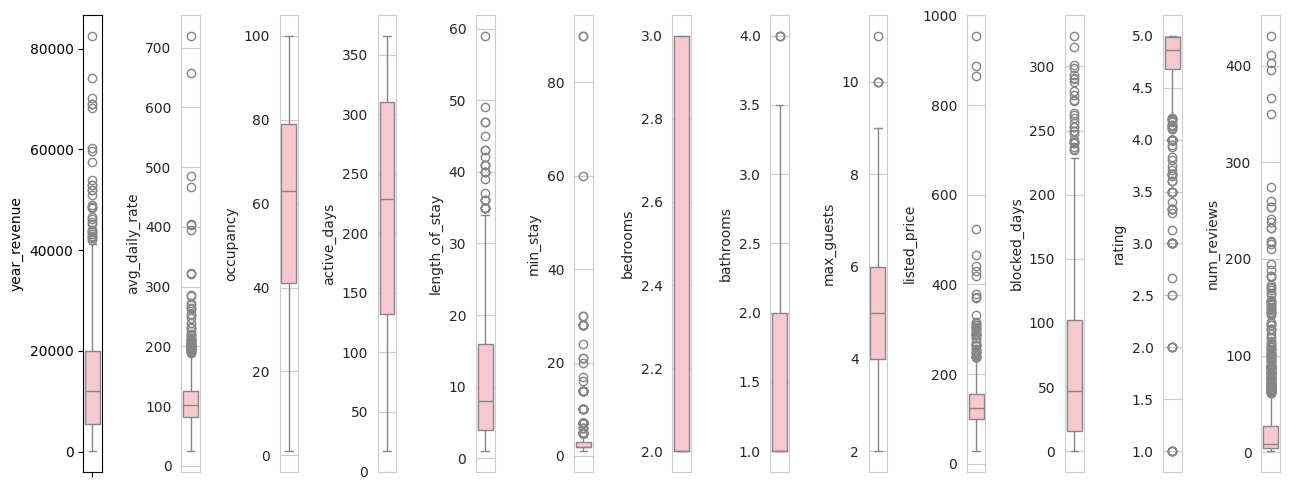

In [84]:
# Get numeric columns only, excluding 'listing_id'
numeric_cols = data.select_dtypes(include='number').columns
l = numeric_cols.values
# Set number of plots per row (columns of the figure grid)
number_of_columns = len(l)
number_of_rows=1

plt.figure(figsize=(number_of_columns, 5*number_of_rows))

for i, col in enumerate(l):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=data[col], color='pink', orient='v')

    plt.tight_layout()

plt.show()

Boxplots display the median, interquartile range (IQR) and any data points that fall outside of 1.5 *IQR from the lower or uppoer quartiles(shown as circles).

Observations:
 1. year_revenue and avg_daily_rate, listed price:
 Both variables exhibit several high-value outliers, likely representing luxury or premium listings. These extreme values can disproportionately influence regression models. To address this, transformation techniques such as log-scaling or capping via winsorization may be necessary.

 2. min_stay, blocked_days:
These features contain notable outliers, including unusually long stay requirements and listings blocked for most of the year. Such anomalies may not reflect typical booking behaviour and could distort model outcomes or reduce predictive reliability. Removing or adjusting these entries may improve data quality and model performance.




#### **Managing Outliers Using Winsorization**

In [85]:
#Using winsorization for outlier management
winsor_cols = ['year_revenue', 'avg_daily_rate', 'listed_price']

for col in winsor_cols:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])

#### **Managing Outliers Using Thresholds**

In [86]:
# Using threshold caps
#min stay for serviced accommodation  set at 7 days

min_stay_count = data[data['min_stay'] > 7].shape[0]
print(f"Listings with min_stay > 7 days: {min_stay_count}")

Listings with min_stay > 7 days: 39


In [87]:
#min blocked days - 225 days
blocked_days_count = data[data['blocked_days'] > 225].shape[0]
print(f"Listings with blocked_days > 225 days: {blocked_days_count}")

Listings with blocked_days > 225 days: 33


In [88]:
data_filtered = data[(data['min_stay'] <= 7) & (data['blocked_days'] <= 225)]

In [89]:
print(f"Original dataset size: {data.shape[0]}")
print(f"Filtered dataset size: {data_filtered.shape[0]}")

Original dataset size: 1124
Filtered dataset size: 1054


In [90]:
data = data_filtered


In [91]:
# Checking outcomes of outlier management
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,14437.970588,110.416746,58.422201,223.360531,10.618596,2.355787,2.362429,1.438805,5.047438,134.805503,61.523719,4.713814,27.955750
std,10975.175865,40.724808,26.432755,98.208855,8.366185,1.375260,0.480930,0.562607,1.338178,49.073787,55.601220,0.470203,48.228355
min,267.000000,47.210000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,58.000000,0.000000,1.000000,1.000000
25%,5634.250000,82.815000,41.000000,138.250000,4.000000,1.000000,2.000000,1.000000,4.000000,100.000000,16.000000,4.670000,4.860000
50%,12490.500000,101.940000,63.000000,234.000000,8.000000,2.000000,2.000000,1.000000,5.000000,125.000000,43.000000,4.860000,9.000000
75%,20623.500000,125.982500,78.000000,313.000000,14.000000,3.000000,3.000000,2.000000,6.000000,155.000000,96.000000,4.980000,28.000000
max,52944.000000,272.970000,100.000000,366.000000,59.000000,7.000000,3.000000,4.000000,11.000000,331.000000,225.000000,5.000000,431.000000


### **3.6. Exploring Categorical Features**

In [92]:
# examining columns with categorical data

categorical_cols = [
    'town', 'management', 'is_active', 'economic_category',
    'beachfront', 'hot_tub', 'ev_charger', 'kitchen',
    'pool', 'pets_allowed', 'smoking_allowed'
]

# Summary info for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False))
    print(f"Unique Values: {data[col].nunique()}")


Column: town
town
Colchester         295
Southend-on-Sea    216
Clacton-on-Sea     142
Grays              118
Chelmsford         114
Brentwood           64
Walton-on-Naze      59
Saffron-Walden      46
Name: count, dtype: int64
Unique Values: 8

Column: management
management
Small         371
Individual    361
Moderate      175
Large         137
Unknown        10
Name: count, dtype: int64
Unique Values: 5

Column: is_active
is_active
Yes    770
No     284
Name: count, dtype: int64
Unique Values: 2

Column: economic_category
economic_category
Midscale    631
Upscale     320
Economy     103
Name: count, dtype: int64
Unique Values: 3

Column: beachfront
beachfront
No     1048
Yes       6
Name: count, dtype: int64
Unique Values: 2

Column: hot_tub
hot_tub
No     1011
Yes      43
Name: count, dtype: int64
Unique Values: 2

Column: ev_charger
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
Unique Values: 2

Column: kitchen
kitchen
Yes    1023
No       31
Name: count, dtype: int

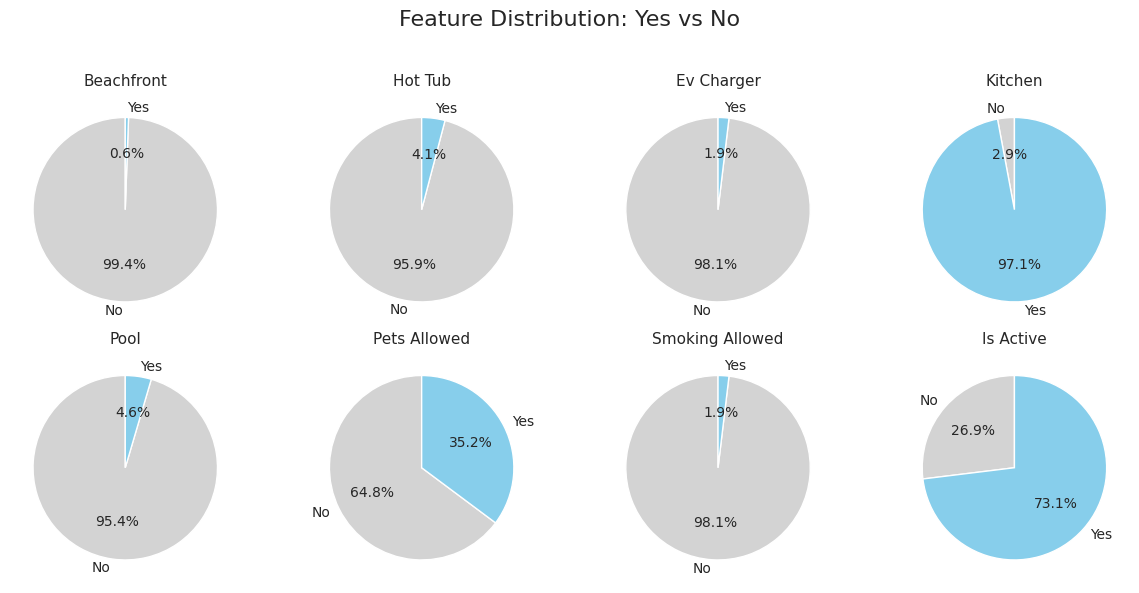

In [93]:
# Piecharts to look at distribution/proportion of outcomes

binary_features = {
    'beachfront': [1048, 6],
    'hot_tub': [1011, 43],
    'ev_charger': [1034, 20],
    'kitchen': [31, 1023],
    'pool': [1006, 48],
    'pets_allowed': [683, 371],
    'smoking_allowed': [1034, 20],
    'is_active': [284, 770]
}

labels = ['No', 'Yes']
colors = ['lightgrey', 'skyblue']

# Set up subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, (feature, values) in enumerate(binary_features.items()):
    ax = axes[i]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=11)

# Adjust layout
plt.suptitle('Feature Distribution: Yes vs No', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

There appears to be some large class imbalances within the binary features. Most noticeable is "Beachfront" and "Ev Charger" and "Smoking Allowed". These skews in proportion may render the analysis of these features insignficant and should be taken into further consideration in Phase 2  when building a machine learning model.

## **4. Correlational Studies Between Features and Target Variables**


### **4.1. Annual Revenue**

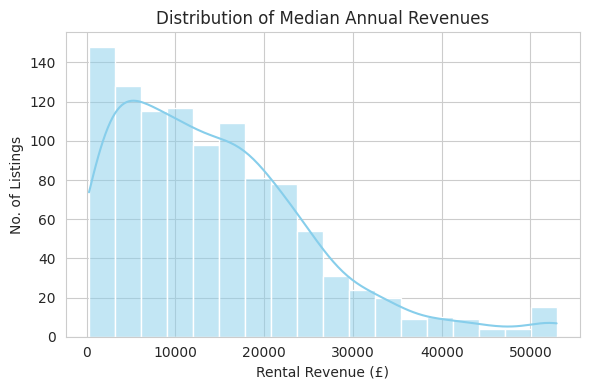

In [94]:
#Visualising distributions

plt.figure(figsize=(6, 4))

sns.histplot(x=data['year_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Median Annual Revenues')
plt.xlabel('Rental Revenue (£)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [95]:
# looking at the top 10 listings with highest revenues:
data[data['year_revenue']>40000].sort_values(by='year_revenue', ascending=False).head(10)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
623,Colchester,52944,201.33,100,350,7.0,2,Large,2,2.0,...,16,5.00,6.00,No,No,No,Yes,No,No,No
622,Colchester,52944,192.79,99,313,6.0,1,Large,2,1.5,...,49,5.00,3.00,No,Yes,No,Yes,No,Yes,No
621,Colchester,52944,147.57,100,366,5.0,3,Small,2,2.0,...,0,5.00,4.00,No,Yes,No,Yes,No,Yes,No
620,Colchester,52944,272.97,95,138,3.0,2,Large,2,1.0,...,6,4.67,3.00,No,Yes,No,Yes,No,Yes,No
1161,Colchester,52944,210.89,95,286,2.0,1,Large,3,2.0,...,80,5.00,4.00,No,No,No,Yes,No,Yes,No
1162,Colchester,52944,231.36,98,304,5.0,2,Large,3,3.0,...,62,5.00,1.00,No,No,No,Yes,No,Yes,No
1160,Colchester,52944,177.78,91,326,5.0,2,Individual,3,2.0,...,40,4.85,144.00,No,No,No,Yes,No,Yes,No
1307,Grays,52944,272.97,70,366,2.0,1,Individual,3,1.5,...,0,4.86,4.86,No,No,No,Yes,No,No,Yes
680,Saffron-Walden,52944,188.33,100,362,5.0,3,Moderate,2,1.0,...,4,5.00,4.00,No,No,No,Yes,No,Yes,No
681,Saffron-Walden,52944,272.97,61,354,2.0,2,Small,2,2.5,...,12,5.00,11.00,No,Yes,Yes,Yes,No,No,No


It can be observed that properties with high revenue have relatively high average daily rates and occupancies (above 70%). This may suggest  that these outliers may be genuine high performing properties.


In [96]:
# Exploring listings with lowest revenues:
data[data['year_revenue']<12000].sort_values(by='year_revenue', ascending=True).head(15)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
690,Clacton-on-Sea,267,64.15,2,161,2.0,2,Individual,2,1.0,...,164,4.86,4.86,No,No,No,Yes,Yes,Yes,No
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,...,55,4.86,1.00,No,No,No,Yes,No,Yes,No
898,Southend-on-Sea,267,107.80,2,56,1.0,1,Individual,3,1.5,...,0,5.00,4.86,No,No,No,Yes,No,No,No
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,72,4.33,6.00,No,No,No,Yes,No,No,No
241,Chelmsford,267,131.05,2,55,1.0,2,Large,2,1.0,...,61,5.00,2.00,No,No,No,Yes,No,No,No
1200,Clacton-on-Sea,267,117.29,7,30,2.0,1,Small,3,2.0,...,99,4.86,4.86,No,No,No,Yes,Yes,No,No
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,...,176,5.00,1.00,No,No,No,Yes,No,No,No
328,Brentwood,267,85.42,3,35,1.0,1,Small,2,2.0,...,7,4.86,4.86,No,No,No,Yes,No,No,No
412,Colchester,267,65.21,2,159,1.0,1,Small,2,1.0,...,167,5.00,1.00,No,No,No,Yes,No,No,No
410,Colchester,267,66.24,1,177,1.0,4,Moderate,2,1.0,...,185,4.86,4.86,No,No,No,Yes,No,Yes,No


In [99]:
low_rev = data[data['year_revenue'] < 12500]
high_rev = data[data['year_revenue'] >= 12500]

print(f"{len(high_rev)} listings are at 50th percentile of revenue (threshold = £12500)")

526 listings are at 50th percentile of revenue (threshold = £12500)


In [100]:
#creating a comparison table of features from low vs high revenue

summary = pd.DataFrame({
    'Low Revenue (<12500)':low_rev.mean(numeric_only=True),
    'High Revenue (≥12500)': high_rev.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Revenue (<12500),High Revenue (≥12500)
year_revenue,5956.09,22952.10
avg_daily_rate,101.54,119.33
occupancy,45.00,71.90
active_days,163.48,283.46
length_of_stay,10.81,10.42
min_stay,2.37,2.34
bedrooms,2.36,2.37
bathrooms,1.39,1.49
max_guests,4.97,5.12
listed_price,125.57,144.08


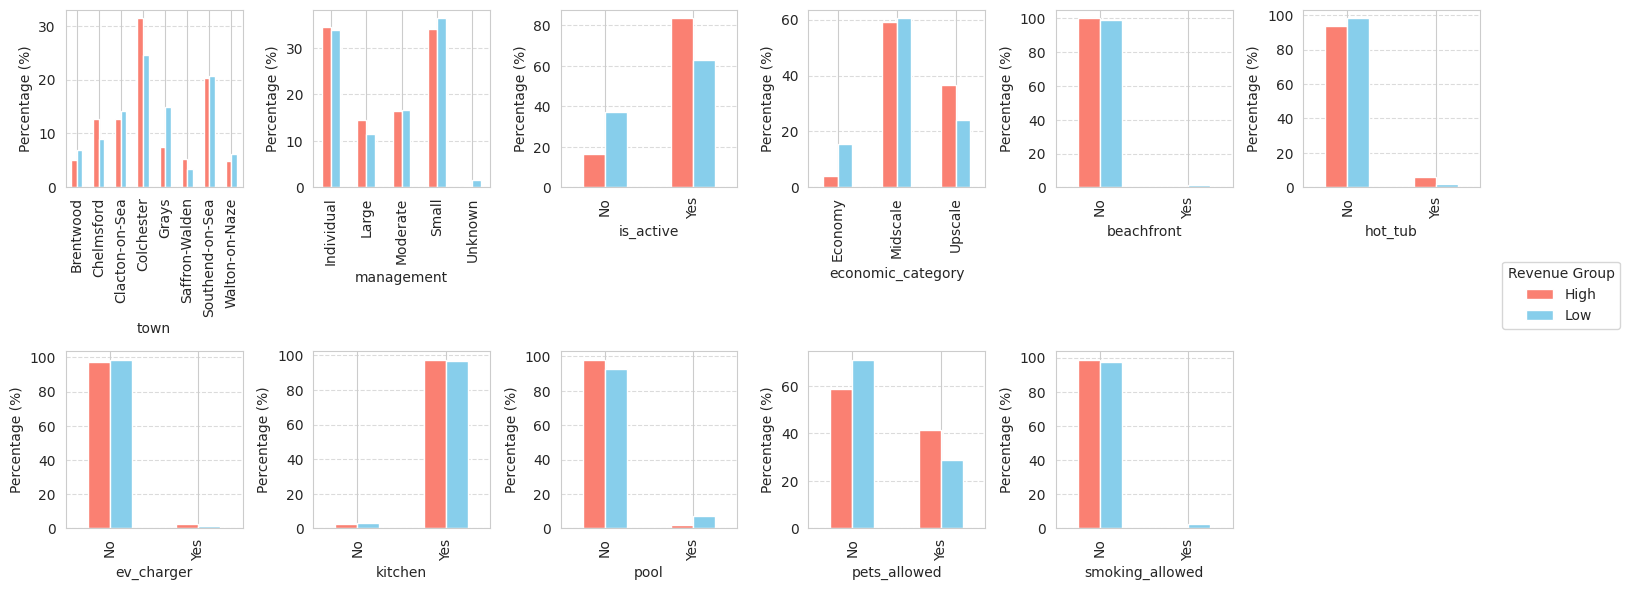

In [101]:
threshold = 12500
data['revenue_group'] = data['year_revenue'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['revenue_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Revenue Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Findings - Revenue vs Categorical Features**
Higher annual revenues are associated with:
- Chelmsford and Colchester areas
- Management by larger organisations
- Active listings
- Upscale economic category
- Availability of a hot tub
- No pool
- Pets allowed


It is however important to note that due to the imbalance of featuredata, it would be difficult to determine significance in these relationships, especially for the availablity of the EV Charger, smoking and beachfront features.

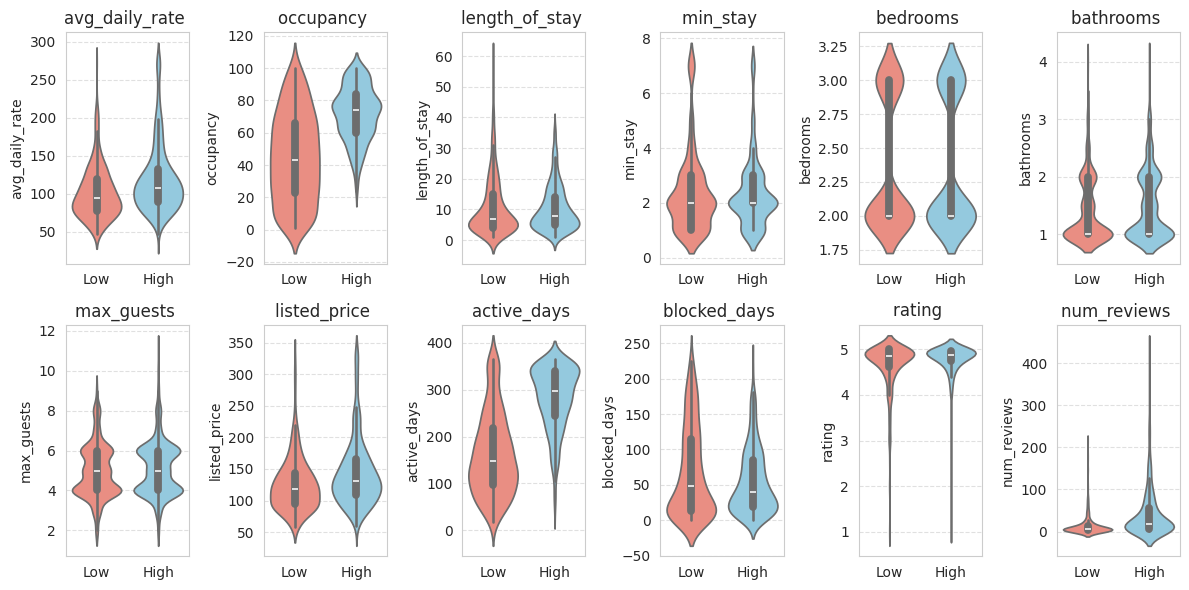

In [102]:
numerical_cols = [
    'avg_daily_rate', 'occupancy', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()


for i, col in enumerate(numerical_cols):
    sns.violinplot(x='revenue_group', y=col, data=data, ax=axes[i], hue='revenue_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



#### **Findings for Revenue vs Numerical Features**
Observations for higher revenue yielding properties:
- higher average daily rate
- higher occupancy
- higher number of active days
- lower length of stay
- higher listed price
- less blocked days
- higher number of reviews

Out of these, there appears to be more significance within the "Active Days" and "Occupancy" which is unsurprising as Revenue is computated using these values.


### **4.2. Occupancy Rates**

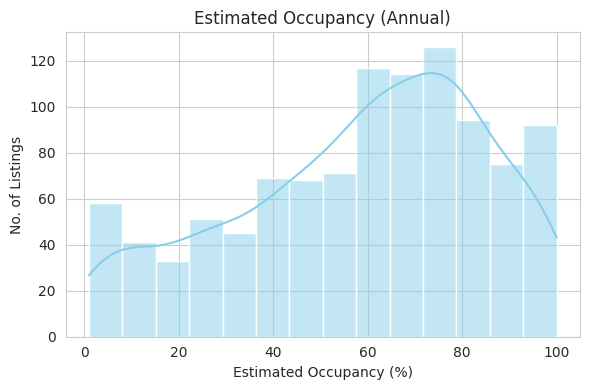

In [103]:
#Observing the descriptive stats for  Occupancy
plt.figure(figsize=(6, 4))

sns.histplot(x=data['occupancy'], kde=True, color='skyblue')
plt.title('Estimated Occupancy (Annual)')
plt.xlabel('Estimated Occupancy (%)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [104]:
data['occupancy'].describe()

,occupancy
count,1054.000000
mean,58.422201
std,26.432755
min,1.000000
25%,41.000000
50%,63.000000
75%,78.000000
max,100.000000


In [105]:
# analysing low occupancy listings, using median value of 63%
low_occupancy_threshold = 63
low_occupancy = data[data['occupancy'] < low_occupancy_threshold]

print(f"{len(low_occupancy)} listings have occupancy < {low_occupancy_threshold}%")
display(low_occupancy.sort_values(by='occupancy'))

524 listings have occupancy < 63%


,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,4.33,6.00,No,No,No,Yes,No,No,No,Low
900,Southend-on-Sea,428,213.88,1,184,2.0,2,Individual,3,1.0,...,4.86,4.86,No,No,No,Yes,No,No,No,Low
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,...,4.86,1.00,No,No,No,Yes,No,Yes,No,Low
799,Walton-on-Naze,376,75.23,1,361,5.0,3,Individual,2,1.5,...,4.50,10.00,No,No,No,Yes,Yes,Yes,No,Low
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,...,5.00,1.00,No,No,No,Yes,No,No,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Colchester,9318,75.76,62,198,19.0,2,Individual,2,1.0,...,5.00,14.00,No,No,No,Yes,Yes,No,No,Low
144,Southend-on-Sea,6430,98.92,62,105,18.0,1,Individual,2,1.0,...,4.80,20.00,No,No,No,Yes,No,Yes,No,Low
221,Southend-on-Sea,23357,105.69,62,355,11.0,3,Moderate,2,1.0,...,5.00,1.00,No,No,No,Yes,No,Yes,No,High
1219,Clacton-on-Sea,6910,77.64,62,144,6.0,2,Individual,3,2.0,...,4.59,27.00,Yes,No,No,Yes,Yes,Yes,Yes,Low


In [106]:
low_occ = data[data['occupancy'] < 63]
high_occ = data[data['occupancy'] >= 63]


In [107]:
#using this thresholds to create comparison table.
summary = pd.DataFrame({
    'Low Occupancy (<63%)':low_occ.mean(numeric_only=True),
    'High Occupancy (≥63%)': high_occ.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Occupancy (<63%),High Occupancy (≥63%)
year_revenue,9487.01,19332.88
avg_daily_rate,112.80,108.06
occupancy,36.69,79.90
active_days,219.02,227.65
length_of_stay,8.84,12.37
min_stay,2.30,2.42
bedrooms,2.40,2.32
bathrooms,1.44,1.44
max_guests,5.19,4.91
listed_price,138.03,131.62


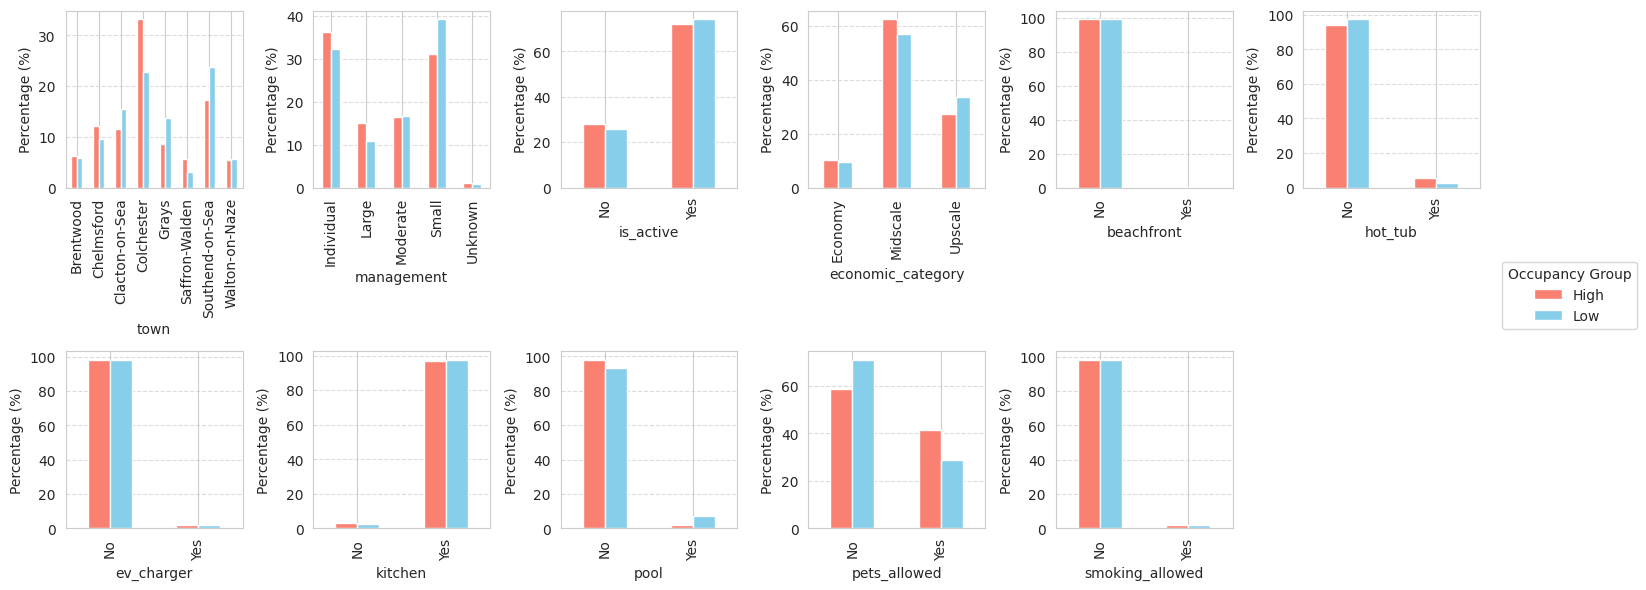

In [108]:
# visualising categorical features

threshold = 63
data['occupancy_group'] = data['occupancy'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['occupancy_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)


    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Occupancy Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Findings - Occupancy vs Categorical Features**
Higher occupancy appears to be accociated with the following categorical data:
- Chemlsford and Colchester
- Economic Cateogory: Midscale
- Management: Individuals or large companies
- Availabilty of a hot tub
- No pool
- Pets allowed

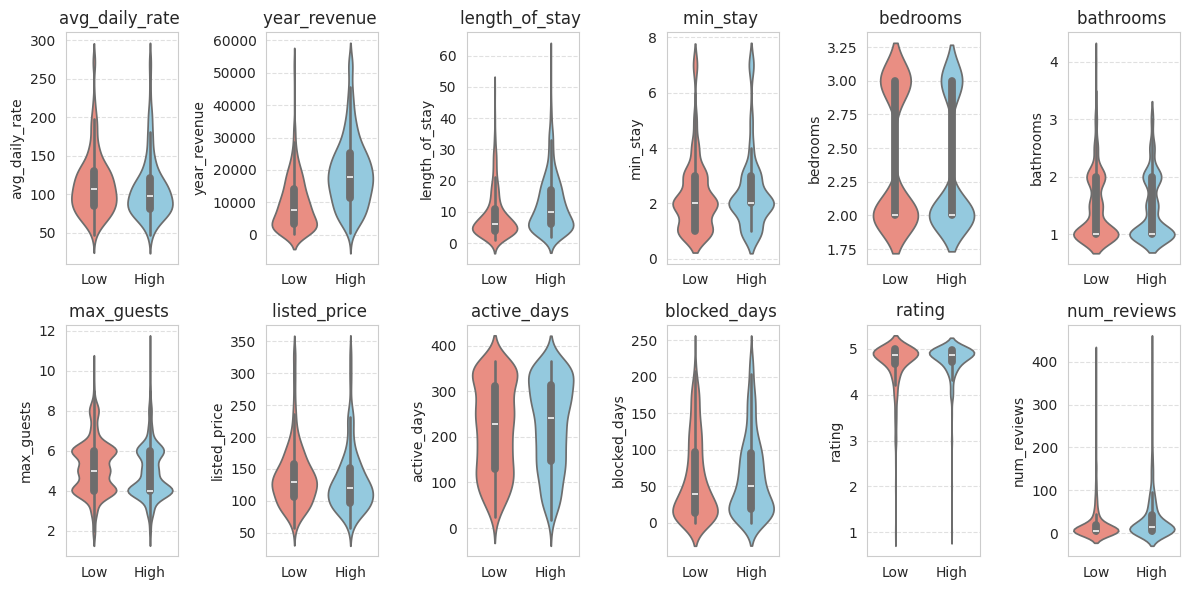

In [109]:
numerical_cols = [
    'avg_daily_rate', 'year_revenue', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='occupancy_group', y=col, data=data, ax=axes[i], hue='occupancy_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy is associated with
- lower average daily rate
- higher active days (i.e listings)
- higher length of stays
- less bedrooms
- lower maximum guests
- lower listed price
- higher number of reviews

There does not appear to be any significant difference between 2 and 3 bedroom properties or number of bathrooms.

In [110]:
data.to_csv('data_cleaned.csv', index=False)

### **4.3 Correlation Coefficients**


#### Data Pre-processing

In [111]:
data_encoded = data.copy()

In [112]:
from sklearn import preprocessing

for x in data_encoded.columns:
    if data_encoded[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(data_encoded[x].values)) # fitting the model
        data_encoded[x] = lbl.transform(list(data_encoded[x].values)) # transforming into various integer codes

### Heatmaps

<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables with Occupancy'}>

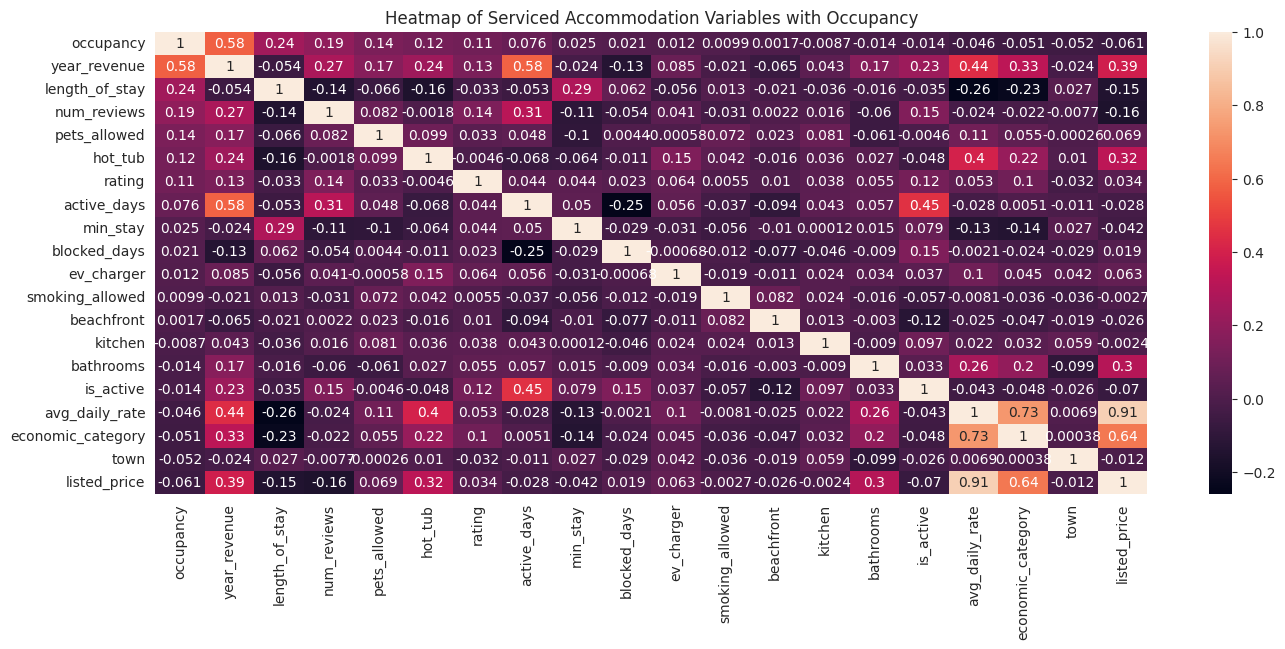

In [113]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables with Occupancy')


#Quality correlation matrix

k = 20  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'occupancy')['occupancy'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Occupancy: the features that appear to be the most correlated are  number of reviews and length of stay


<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables vs Revenue'}>

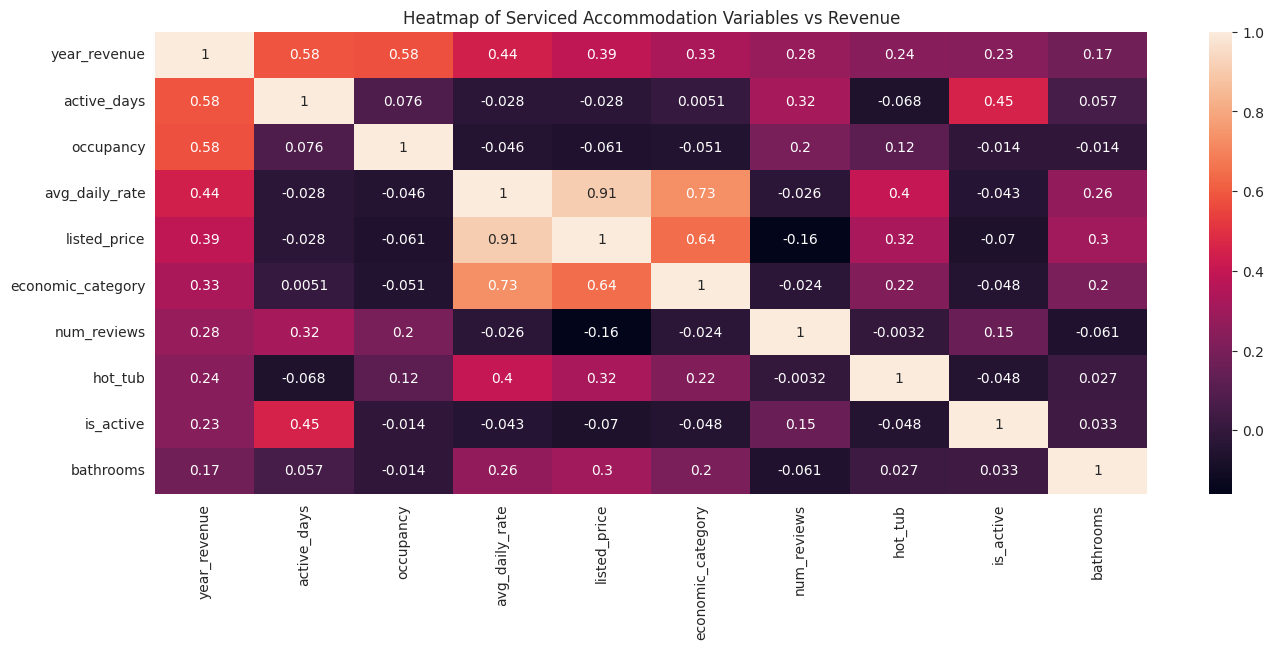

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables vs Revenue')


#Quality correlation matrix

k =10  # number of variables for heatmap # want to just pick out the top 12
cols = data_encoded.corr().nlargest(k, 'year_revenue')['year_revenue'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Annual revenue: Highest correlation occurs with the number of active days listed, average daily rate and listed price, economic category  and number of reviews.

### **4.4 Summary of Findings**


Whilst calculating correlational coefficients have not show strong correlations between property features, occupancy rates and annual revenue, some patterns have emerged.

**Property Features**
Chelmsford and Colchester appear to be the most likely areas of higher occupancy rates and higher annual return.
There is no evidence to show that more bedrooms, beachfront properties or availablility of a pool or EV charger on the properties will yield better earnings.
There is some weak evidence that the availability of a hot-tub, properties considered within a higher economic bracket, more bathrooms and pet-friendly may be slightly more profitable.

**Listing and Host Features**
Listed price and average daily rate of a property has the strongest relationship with revenue but does not impact occupancy rates. For both target variables, the listing has a positive correlationship with occupancy and revenue, suggesting that customers are more likely to book  a property if that property has had a record of reviews. However, rating has a weak correlation between both groups.


#**Phase 2 - Machine Learning - Predictive Modelling**

## **5. Introduction**

In phase 2, we will be looking at our second objective of the study, which is to train and select a predictive model that will assist the client in selecting profitable properties for their serviced accommodation business.

The following processes will be conducted

1. Feature Engineering and Preprocessing the Data

- Selecting target variable and features
- Drop multicollinear and redundant features.
- Encode categorical variables.
- Scale numerical features.

2. The data will be split into the following:

- 70% Training
- 15% Validation
- 15% Test

3. Models to Use

- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Neural Network

4.  Model Evaluation
We will compare their performance using metrics:
 - accuracy
 - precision
 - recall
 - F1-score
 - confusion matrix
 - ROC-AUC

5. Hyperparameter Tuning


### **5.1. Importing Relevant Libraries**

*Note: An older version of scikit-learn is required to run current version of scikeras.*

In [1]:
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [2]:
!pip install scikeras[tensorflow]

In [3]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [4]:

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve
from sklearn.pipeline import Pipeline


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier


###**5.2. Import Cleaned Data**

*Note: If you are running the code from Phase 2 directly, you can import the cleaned data from Phase 1 directly from this section. Please ensure that your file path saved locally is correct within the next code.*

In [6]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group,occupancy_group
0,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,0,No,No,No,Yes,No,Yes,No,Low,Low
1,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,0,No,No,No,Yes,No,No,No,Low,Low
2,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,4,No,No,No,Yes,No,No,No,Low,Low
3,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,0,No,No,No,Yes,No,No,No,Low,Low
4,Grays,725,103.58,20,35,4.0,3,Small,2,1.0,...,0,No,No,No,Yes,No,No,No,Low,Low


###**5.3. Selection of Target Variable and Features**

The primary objective for a serviced accommodation business is to acquire properties that generate the highest possible annual revenue.
Based on the feature and target variable analysis in phase 1, there is a strong positive correlation between occupancy and annual revenue, with a correlation coefficient of **0.58.**

Similarly, active days also shows a strong correlation with revenue. This is expected, as revenue is a function of both the average daily rate and the number of days the property is occupied — which is closely linked to how many days the listing is active.

The scatterplot below illustrates the multicollinearity between active days, occupancy, and revenue, highlighting how these variables interact to influence the property's earning potential.

Text(0, 0.5, 'Annual Revenue (£)')

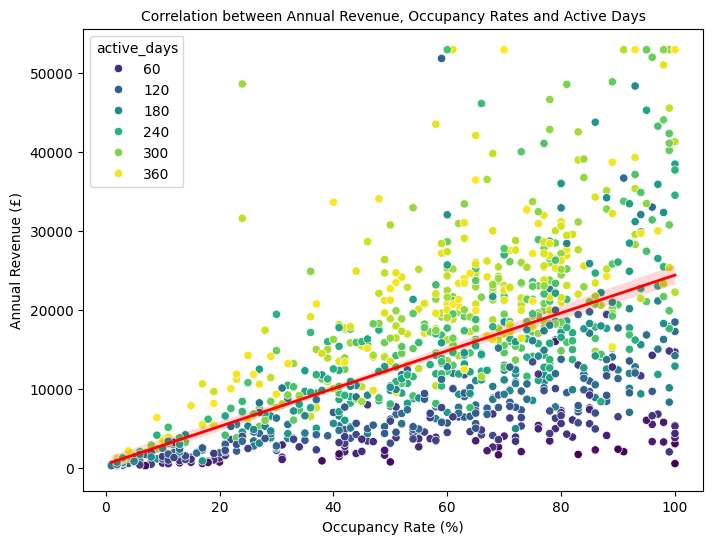

In [7]:
#scatterplot to show correlation between occupancy and revenue
plt.figure(figsize = (8, 6))
plt.title('Correlation between Annual Revenue, Occupancy Rates and Active Days', fontsize=10)

sns.scatterplot(data=data, x= 'occupancy', y='year_revenue', hue='active_days', palette='viridis')

sns.regplot(data=data, x='occupancy', y='year_revenue', scatter=False, color='red', line_kws={'linewidth': 2, 'label': 'Trendline'})

plt.xlabel('Occupancy Rate (%)')
plt.ylabel('Annual Revenue (£)')

Revenue is computated as follows:

> **Revenue = avg_daily_rate × active_days × occupancy**

As can be seen in this scatterplot, the higher the active days (i.e the lighter colours), the higher the annual the revenue.

#### **5.3.1. Selection of Target Variable**
To simplify model selection and reduce the effect of multicollinearity, it is decided that the target focus will be on **Occupancy**  as the target variable as revenue outcomes are directly influenced by occupancy rate and it is less affected by the number of active days the property is listed (corr = 0.07).

> **We will be using `occupancy_group` (binary classification >= 63% High, <63% Low) as the target variable.**







### Feature Exclusion Rationale

Following the initial exploratory analysis and target variable assessment, several features have been excluded from the predictive modelling process for the reasons outlined below:

#### 1. Exclusion of Availability-Driven Features
The feature `active_days`, along with closely associated variables, has been removed:
- `is_active`: Indicates whether the property was active at the time of data collection.
- `blocked_days`: Reflects the number of days a property was made unavailable by the host.

**Rationale:** These features primarily reflect listing availability rather than intrinsic property characteristics. Since the aim of this study is to identify high-performing listings based on attributes that can inform property investment or improvement strategies, availability-based variables fall outside the scope of influence and interest. Their removal does not impact the integrity of the analysis.

#### 2. Exclusion of `length_of_stay`
This variable represents guest behavior and is inherently **outcome-driven**, closely related to the target variable `occupancy`. Including it would introduce **data leakage**, as it reflects post-booking behavior rather than a property trait.

#### 3. Exclusion of `management`
The type of management (e.g., agency-managed vs. self-managed) is considered a **static business decision** that is unlikely to be influenced by property characteristics or easily changeable. As such, it is excluded to ensure the focus remains on actionable or investable features.

In [71]:
print(data['beachfront'].value_counts())
print(data['ev_charger'].value_counts())
print(data['smoking_allowed'].value_counts())

beachfront
No     1048
Yes       6
Name: count, dtype: int64
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
smoking_allowed
No     1034
Yes      20
Name: count, dtype: int64


2. Due to large feature class inbalances as shown above, these features are statistically unreliable for modelling and risks overfitting and added noise. These features will also be excluded from the study.

###**5.4. Data Pre-processing**



#### **5.4.1. Removing excluded features**

In [103]:
df = data.copy()

In [104]:
# Exclude multicollinear/redundant features
drop_cols = ['occupancy', 'year_revenue', 'active_days', 'blocked_days', 'is_active', 'revenue_group', 'management', 'length_of_stay', 'beachfront', 'listed_price']
df = df.drop(columns=drop_cols)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1054 non-null   object 
 1   avg_daily_rate     1054 non-null   float64
 2   min_stay           1054 non-null   int64  
 3   bedrooms           1054 non-null   int64  
 4   bathrooms          1054 non-null   float64
 5   max_guests         1054 non-null   int64  
 6   economic_category  1054 non-null   object 
 7   rating             1054 non-null   float64
 8   num_reviews        1054 non-null   int64  
 9   hot_tub            1054 non-null   object 
 10  ev_charger         1054 non-null   object 
 11  kitchen            1054 non-null   object 
 12  pool               1054 non-null   object 
 13  pets_allowed       1054 non-null   object 
 14  smoking_allowed    1054 non-null   object 
 15  occupancy_group    1054 non-null   object 
dtypes: float64(3), int64(4),

#### **5.4.2. Convert binary columns to Booleans**

In [106]:
#convert Yes/No columns to boolean
yes_no_cols = ['ev_charger', 'hot_tub', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed']

for col in yes_no_cols:
  df[col]=df[col].map({'Yes':1, 'No': 0}).astype('bool')


In [107]:
#checking conversion
df.head()

,town,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,economic_category,rating,num_reviews,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,occupancy_group
0,Grays,113.31,4,2,1.0,5,Upscale,4.86,0,False,False,True,False,True,False,Low
1,Grays,119.41,1,2,2.0,4,Upscale,4.42,0,False,False,True,False,False,False,Low
2,Grays,156.73,2,2,2.0,5,Upscale,5.00,4,False,False,True,False,False,False,Low
3,Grays,86.08,2,2,1.0,5,Midscale,4.86,0,False,False,True,False,False,False,Low
4,Grays,103.58,3,2,1.0,4,Midscale,4.86,0,False,False,True,False,False,False,Low


#### **5.4.3. One-Hot Encoding to Cateogorical variables**

One-Hot Encoding will be used instead of LabelEncoder as this would be more suited to Support Vector machine and is the standard to when mixing models.

In [108]:
categorical_cols = ['town', 'economic_category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [109]:
#format all column names to lower case
df.columns = [col.replace(' ', '_').replace('-', '_').lower() for col in df.columns]
df.head()

,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,rating,num_reviews,hot_tub,ev_charger,kitchen,...,occupancy_group,town_chelmsford,town_clacton_on_sea,town_colchester,town_grays,town_saffron_walden,town_southend_on_sea,town_walton_on_naze,economic_category_midscale,economic_category_upscale
0,113.31,4,2,1.0,5,4.86,0,False,False,True,...,Low,False,False,False,True,False,False,False,False,True
1,119.41,1,2,2.0,4,4.42,0,False,False,True,...,Low,False,False,False,True,False,False,False,False,True
2,156.73,2,2,2.0,5,5.00,4,False,False,True,...,Low,False,False,False,True,False,False,False,False,True
3,86.08,2,2,1.0,5,4.86,0,False,False,True,...,Low,False,False,False,True,False,False,False,True,False
4,103.58,3,2,1.0,4,4.86,0,False,False,True,...,Low,False,False,False,True,False,False,False,True,False


#### **5.4.4. Preprocessing Target Variable ('occupancy_group')**

The target variable ('occupancy_group) will be encoded as

**Low** (i.e < 63% occupancy) = 0

**High** (i.e >= 63%) = 1

In [110]:
df['occupancy_group'] = df['occupancy_group'].map({'Low': 0, 'High': 1})


In [111]:
df['occupancy_group']

,occupancy_group
0,0
1,0
2,0
3,0
4,0
...,...
1049,1
1050,1
1051,1
1052,1


#### Checking for class imbalance in the target variable

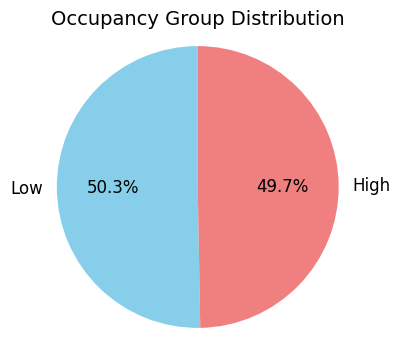

In [112]:
occupancy_counts = df['occupancy_group'].value_counts()
sizes = occupancy_counts.values
colors = ['skyblue', 'lightcoral']
labels=["Low", "High"]
# Plot pie chart
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Occupancy Group Distribution', fontsize=14)
plt.axis('equal')
plt.show()

As the median was used to determine thresholds of occupancy rate, the target variable is balanced.


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1054 non-null   object 
 1   avg_daily_rate     1054 non-null   float64
 2   min_stay           1054 non-null   int64  
 3   bedrooms           1054 non-null   int64  
 4   bathrooms          1054 non-null   float64
 5   max_guests         1054 non-null   int64  
 6   listed_price       1054 non-null   int64  
 7   economic_category  1054 non-null   object 
 8   rating             1054 non-null   float64
 9   num_reviews        1054 non-null   int64  
 10  hot_tub            1054 non-null   object 
 11  ev_charger         1054 non-null   object 
 12  kitchen            1054 non-null   object 
 13  pool               1054 non-null   object 
 14  pets_allowed       1054 non-null   object 
 15  smoking_allowed    1054 non-null   object 
 16  occupancy_group    1054 

### **5.5. Splitting Dataset**

The data set is split into the train, validation and test sets.

In [113]:
X = df.drop(['occupancy_group'], axis=1)  #drop the target variable
y = df[['occupancy_group']]

In [114]:
X = df.drop(columns=['occupancy_group'])
y = df['occupancy_group']

In [115]:
#splitting the data into train, val and test sets

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [116]:
print(f"X_train:{X_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"y_test:{y_test.shape}")
print(f"X_val:{X_val.shape}")
print(f"y_val:{y_val.shape}")

X_train:(843, 22)
y_train:(843,)
X_test:(106, 22)
y_test:(106,)
X_val:(105, 22)
y_val:(105,)


### **5.6. Feature Scaling**


In [117]:
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols].head()

,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,rating,num_reviews
587,129.91,2,2,1.5,5,5.00,9
439,99.92,2,2,1.0,5,5.00,1
960,81.58,1,3,1.5,8,5.00,13
167,106.96,2,2,1.0,4,4.83,6
893,125.96,2,3,1.5,6,4.90,165


In [118]:
col_to_scale = ['avg_daily_rate', 'min_stay','bedrooms', 'bathrooms','max_guests', 'rating', 'num_reviews' ]
scaler = StandardScaler()
X_train[col_to_scale] = scaler.fit_transform(X_train[col_to_scale])
X_test[col_to_scale] = scaler.fit_transform(X_test[col_to_scale])
X_val[col_to_scale] = scaler.fit_transform(X_val[col_to_scale])

#### Checking scaling

In [119]:
X_train[col_to_scale].head()

,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,rating,num_reviews
587,0.492820,-0.267258,-0.741372,0.101057,-0.014336,0.625063,-0.366794
439,-0.262124,-0.267258,-0.741372,-0.795694,-0.014336,0.625063,-0.531815
960,-0.723800,-0.994028,1.348851,0.101057,2.251573,0.625063,-0.284284
167,-0.084904,-0.267258,-0.741372,-0.795694,-0.769638,0.244270,-0.428677
893,0.393386,-0.267258,1.348851,0.101057,0.740967,0.401067,2.851109


In [120]:
X_test[col_to_scale].head()

,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,rating,num_reviews
953,-0.711866,-0.196988,1.310705,-0.667057,0.569112,0.272914,-0.496425
51,-0.526722,-0.196988,-0.762948,-0.667057,-0.175652,-0.394895,-0.470630
958,-1.402035,-0.196988,1.310705,-0.667057,0.569112,-0.068095,0.303209
27,-0.037244,0.548752,-0.762948,1.078820,-0.920415,0.429210,-0.341657
461,-0.375968,3.531710,-0.762948,-0.667057,-0.920415,0.343958,0.071057


In [121]:
X_val[col_to_scale].head()


,avg_daily_rate,min_stay,bedrooms,bathrooms,max_guests,rating,num_reviews
402,-0.308048,3.334653,-0.849301,0.926370,-0.763674,0.737642,-0.289918
772,0.583139,0.464665,1.177439,-0.780101,-0.060290,0.737642,-0.592374
1009,0.000624,-0.252832,1.177439,-0.780101,0.643094,0.737642,-0.592374
978,-0.179616,0.464665,1.177439,0.926370,0.643094,0.519379,0.919909
83,-0.635005,-0.252832,-0.849301,-0.780101,-0.763674,-0.041871,-0.556791


In [122]:
assert (X_train.dtypes == X_test.dtypes).all()

In [123]:
assert (X_test.dtypes == X_val.dtypes).all()

In [125]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 843 entries, 587 to 161
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   avg_daily_rate              843 non-null    float64
 1   min_stay                    843 non-null    float64
 2   bedrooms                    843 non-null    float64
 3   bathrooms                   843 non-null    float64
 4   max_guests                  843 non-null    float64
 5   rating                      843 non-null    float64
 6   num_reviews                 843 non-null    float64
 7   hot_tub                     843 non-null    bool   
 8   ev_charger                  843 non-null    bool   
 9   kitchen                     843 non-null    bool   
 10  pool                        843 non-null    bool   
 11  pets_allowed                843 non-null    bool   
 12  smoking_allowed             843 non-null    bool   
 13  town_chelmsford             843 non-nu

## **6. Training the Models and Hyperparameter Tuning**

### **6.1. Model Selection and Rationale**

In this study, the aim is to build a classification model capable of predicting occupancy performance (e.g., occupancy_group as "high" or "low") based on a diverse set of property and listing features. To address this problem, a selection of classification algorithms was chosen based on their theoretical suitability, empirical success in similar tasks, and ability to capture different types of relationships in the data. Each model offers unique strengths in terms of interpretability, complexity handling, and performance. The following models were selected:

**1. Logistic Regression**

Logistic Regression was chosen as a baseline model due to its simplicity, interpretability, and widespread use in binary classification tasks. It assumes a linear relationship between the independent variables and the log-odds of the dependent binary variable.

Although it may not capture complex patterns or interactions, it serves as a strong reference point to compare more advanced models. Furthermore, its coefficients offer direct insights into feature importance, making it valuable for initial analysis and explainability.

**2. Random Forest**

Random Forest is a robust ensemble method based on decision trees. It was selected for its ability to model non-linear relationships and interactions between features without requiring feature scaling or extensive preprocessing.

Random Forest is particularly effective in datasets with a mix of numerical and categorical variables, as is the case in this project. Additionally, its built-in feature importance scores provide a useful way to evaluate which variables contribute most to model performance. It is less prone to overfitting than individual decision trees due to its use of bagging and random feature selection.

**3. Support Vector Machines (SVM)**

Support Vector Machines were chosen due to their strength in high-dimensional spaces and ability to define complex decision boundaries using kernel functions.

In particular, the use of a radial basis function (RBF) kernel can capture non-linear relationships between features and the target class.

SVMs are known for their generalisation ability and robustness, especially in cases where the data is not linearly separable. While SVMs can be computationally intensive on large datasets, the size of the dataset used in this study is moderate (n=1054), making them a feasible and promising option.

**4. K-Nearest Neighbours (KNN)**

K-Nearest Neighbours was included as a non-parametric model that makes minimal assumptions about the data distribution. It classifies a data point based on the majority class of its nearest neighbours in the feature space.

KNN is intuitive and can perform well in cases where class boundaries are complex and local patterns dominate. However, its performance can be sensitive to the choice of k and the scaling of features, which will be addressed through hyperparameter tuning. Despite its simplicity, KNN provides a useful benchmark and an alternative perspective on the classification task.

**5. Neural Networks**

Neural Networks (NN) were selected to capture non-linear interactions and complex feature combinations that may not be easily learned by other models. Neural networks are capable of approximating any continuous function given sufficient capacity and training data. In this context, they are well-suited for uncovering subtle relationships within the data, especially with a mix of numeric and binary categorical inputs. While neural networks require more tuning and computational resources, they offer high flexibility and have shown state-of-the-art performance in many classification problems.

###**6.2. Logistic Regression**

In [126]:
#Building the model
logreg = LogisticRegression(max_iter=5000, solver='liblinear',random_state=42)
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_val)
logreg_prob = logreg.predict_proba(X_val)[:, 1]


In [136]:
from scipy.stats import loguniform

logreg = LogisticRegression(solver='liblinear')
# Define parameter distribution
logreg_params = {
    'C': loguniform(0.01, 100),  # Continuous range instead of discrete list
    'penalty': ['l1', 'l2']
}

# RandomizedSearchCV
logreg_tuned = RandomizedSearchCV(logreg, logreg_params, n_iter=500, cv=5,
                                   scoring='roc_auc', random_state=42)
logreg_tuned.fit(X_train, y_train)

# Evaluate
best_logreg = logreg_tuned.best_estimator_
best_logreg_preds = best_logreg.predict(X_val)
best_logreg_prob = best_logreg.predict_proba(X_val)[:, 1]

print("Best Logistic Regression Params:", logreg_tuned.best_params_)
print("Best ROC AUC (LogReg):", logreg_tuned.best_score_)

Best Logistic Regression Params: {'C': np.float64(0.8346037418037718), 'penalty': 'l1'}
Best ROC AUC (LogReg): 0.6604207064351846


In [137]:
def report_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(classification_report(y_true, y_pred))

In [138]:
report_model("Logistic Regression", y_val, logreg_preds)
report_model("Logistic Regression (Tuned)", y_val, best_logreg_preds)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        52
           1       0.60      0.66      0.63        53

    accuracy                           0.61       105
   macro avg       0.61      0.61      0.61       105
weighted avg       0.61      0.61      0.61       105


Logistic Regression (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        52
           1       0.61      0.66      0.64        53

    accuracy                           0.62       105
   macro avg       0.62      0.62      0.62       105
weighted avg       0.62      0.62      0.62       105



### **6.3.Random Forest**

In [146]:
#Building the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
rf_prob = rf.predict_proba(X_val)[:, 1]


In [149]:

from scipy.stats import randint
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution
rf_params = {
    'n_estimators': randint(100, 301),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11)
}

# RandomizedSearchCV
rf_tuned = RandomizedSearchCV(rf, rf_params, n_iter=50, cv=5,
                              scoring='roc_auc', random_state=42, n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Evaluate
best_rf = rf_tuned.best_estimator_
print("Best Random Forest Params:", rf_tuned.best_params_)
print("Best ROC AUC (RF):", rf_tuned.best_score_)




Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 153}
Best ROC AUC (RF): 0.6984321760832848


In [150]:
best_rf_preds = best_rf.predict(X_val)
best_rf_prob = best_rf.predict_proba(X_val)[:, 1]

In [151]:
report_model("Random Forest", y_val, rf_preds)
report_model("Random Forest (Tuned)", y_val, best_rf_preds)


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57        52
           1       0.58      0.60      0.59        53

    accuracy                           0.58       105
   macro avg       0.58      0.58      0.58       105
weighted avg       0.58      0.58      0.58       105


Random Forest (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.65      0.64        52
           1       0.64      0.60      0.62        53

    accuracy                           0.63       105
   macro avg       0.63      0.63      0.63       105
weighted avg       0.63      0.63      0.63       105



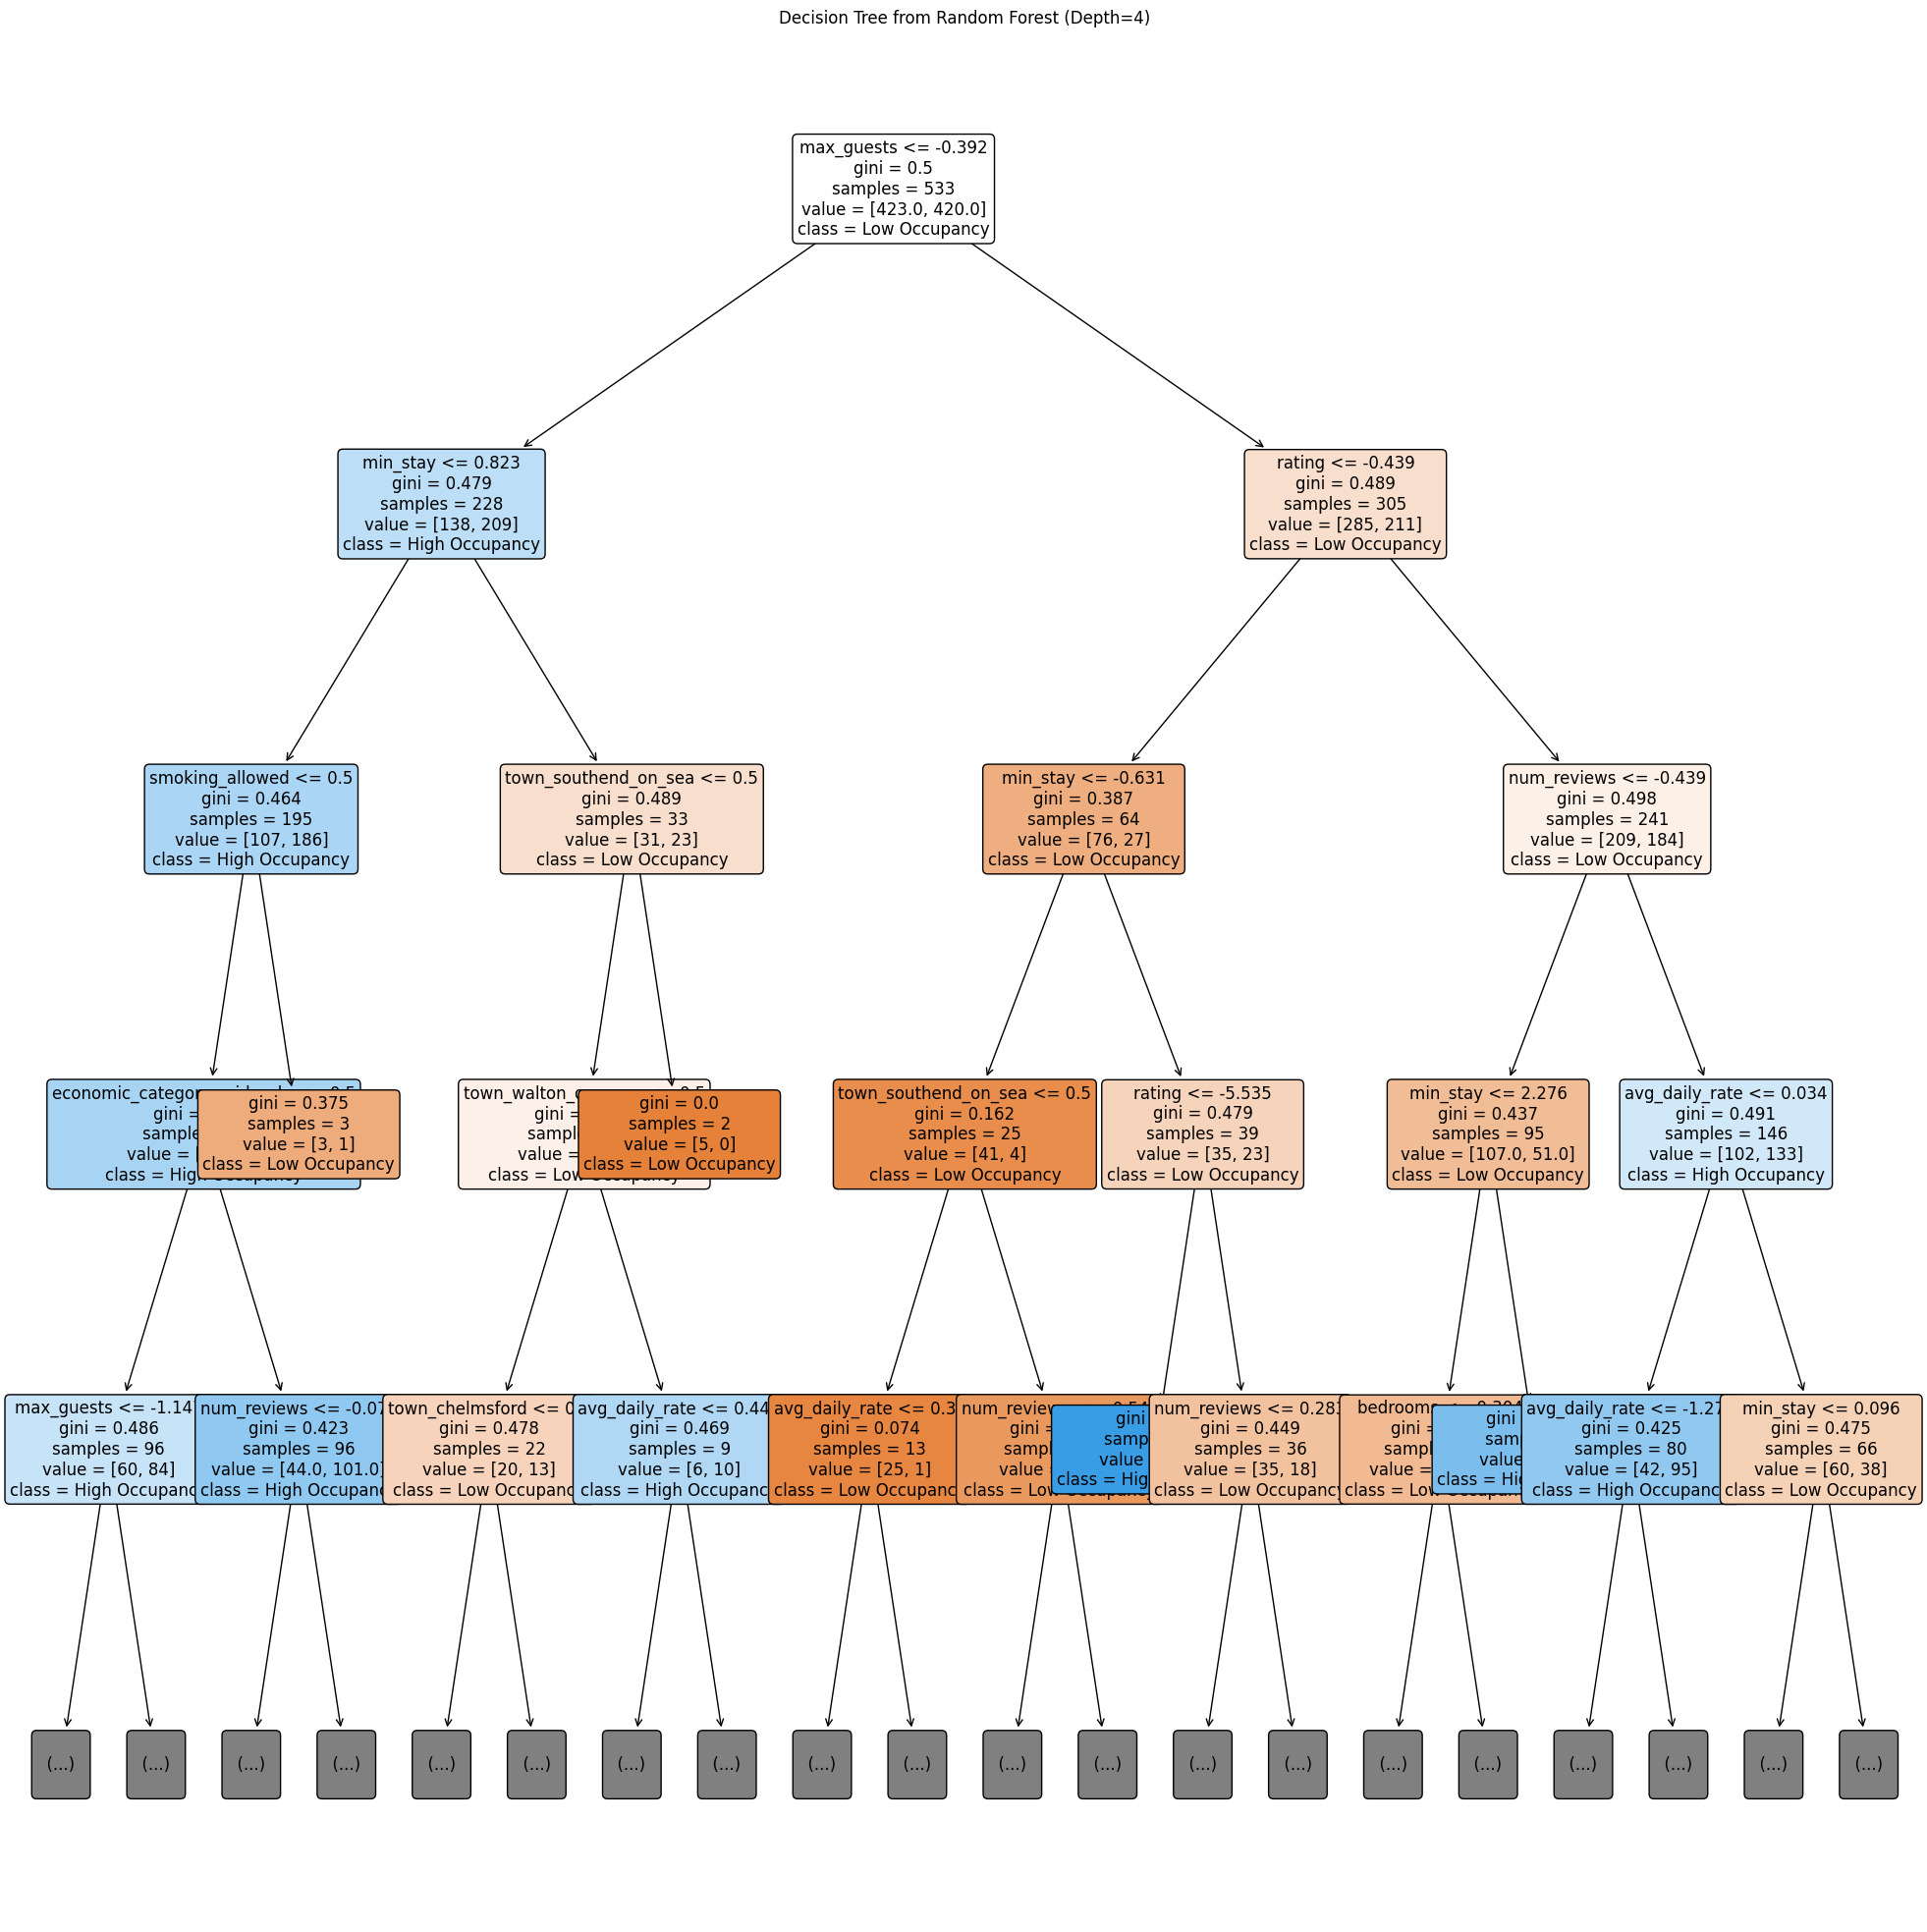

In [152]:
single_tree = best_rf.estimators_[0] # Extract a single tree from the Random Forest
max_depth = 4 # Set the maximum depth for the plot for readability
plt.figure(figsize=(25, 25))
plot_tree(single_tree, feature_names=X_train.columns, class_names=['Low Occupancy', 'High Occupancy'], filled=True, rounded=True, fontsize=12, max_depth=max_depth)
plt.title(f'Decision Tree from Random Forest (Depth={max_depth})')
plt.show();

### **6.3. Support Vector Machines**

In [160]:
#Building the model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_val)
svm_prob = svm.predict_proba(X_val)[:, 1]


In [162]:


# Define parameter distribution
svm_params = {
    'C': loguniform(0.01, 100),        # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']        # Kernel coefficient
}

# RandomizedSearchCV
svm_tuned = RandomizedSearchCV(svm, svm_params, n_iter=100, cv=5,
                               scoring='roc_auc', random_state=42, n_jobs=-1)
svm_tuned.fit(X_train, y_train)


print("Best SVM Params:", svm_tuned.best_params_)
print("Best ROC AUC (SVM):", svm_tuned.best_score_)

Best SVM Params: {'C': np.float64(0.093033584254965), 'gamma': 'auto', 'kernel': 'linear'}
Best ROC AUC (SVM): 0.6578145756294487


In [163]:
best_svm = svm_tuned.best_estimator_
best_svm_preds = best_svm.predict(X_val)
best_svm_prob = best_svm.predict_proba(X_val)[:, 1]

In [164]:
report_model("Support Vector Machines", y_val, svm_preds)
report_model("Support Vector Machines (Tuned)", y_val, best_svm_preds)


Support Vector Machines Evaluation:
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        52
           1       0.57      0.70      0.63        53

    accuracy                           0.58       105
   macro avg       0.58      0.58      0.57       105
weighted avg       0.58      0.58      0.57       105


Support Vector Machines (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        52
           1       0.58      0.62      0.60        53

    accuracy                           0.58       105
   macro avg       0.58      0.58      0.58       105
weighted avg       0.58      0.58      0.58       105



### **6.4. K-Nearest Neighbour**

In [165]:
#Building the model
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_val)
knn_prob = knn.predict_proba(X_val)[:, 1]

In [166]:
# Define parameter distribution
knn_params = {
    'n_neighbors': randint(3, 31),           # Try different k values
    'weights': ['uniform', 'distance'],      # Weight function
    'metric': ['euclidean', 'manhattan']     # Distance metric
}

# RandomizedSearchCV
knn_tuned = RandomizedSearchCV(knn, knn_params, n_iter=20, cv=5,
                               scoring='roc_auc', random_state=42, n_jobs=-1)
knn_tuned.fit(X_train, y_train)

# Evaluate
best_knn = knn_tuned.best_estimator_
best_knn_preds = best_knn.predict(X_val)
best_knn_prob = best_knn.predict_proba(X_val)[:, 1]

print("Best KNN Params:", knn_tuned.best_params_)
print("Best ROC AUC (KNN):", knn_tuned.best_score_)


Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 30, 'weights': 'distance'}
Best ROC AUC (KNN): 0.6351876774806309


In [167]:
report_model("K-Nearest Neighbors", y_val, knn_preds)
report_model("K-Nearest Neighbors (Tuned)", y_val, best_knn_preds)


K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        52
           1       0.53      0.53      0.53        53

    accuracy                           0.52       105
   macro avg       0.52      0.52      0.52       105
weighted avg       0.52      0.52      0.52       105


K-Nearest Neighbors (Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.56      0.52      0.54        52
           1       0.56      0.60      0.58        53

    accuracy                           0.56       105
   macro avg       0.56      0.56      0.56       105
weighted avg       0.56      0.56      0.56       105



### **6.5. Neural Networks**

In [168]:
X_nn_train = X_train.to_numpy()
X_nn_val = X_val.to_numpy()
X_nn_test = X_test.to_numpy()

X_nn_train = np.asarray(X_nn_train).astype('float32')
X_nn_val = np.asarray(X_nn_val).astype('float32')
X_nn_test = np.asarray(X_nn_test).astype('float32')


In [169]:
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(X_nn_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [170]:

nn = create_model(optimizer='adam', dropout_rate=0.3)
history = nn.fit(
    X_nn_train, y_train,
    validation_data=(X_nn_val, y_val),
    batch_size=32,
    epochs=25,
    verbose=0
)

In [171]:
# Predict probabilities
nn_preds = nn.predict(X_nn_val).flatten()  # Flatten needed to match shape

# Convert to class labels (binary)
nn_preds = (nn_preds > 0.5).astype(int)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [172]:
nn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,293 (48.02 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,196 (32.02 KB)

In [173]:

#hyperparameter tuning
model = KerasClassifier(
    model=create_model,
    optimizer='adam',
    dropout_rate=0.0,
    batch_size=32,
    epochs=25
)

param_dist = {
    'optimizer': ['adam'],
    'dropout_rate': [0.0, 0.2, 0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [10,25]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

nn_tuned = random_search.fit(X_nn_train, y_train)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5308 - loss: 0.6987
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5358 - loss: 0.6938 
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 0.6821
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5394 - loss: 0.6787 
Epoch 5/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5816 - loss: 0.6807 
Epoch 6/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6003 - loss: 0.6644
Epoch 7/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5798 - loss: 0.6758 
Epoch 8/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5895 - loss: 0.6619 
Epoch 9/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6084 - loss: 0.6635 
Epoch 10/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5909 - loss: 0.6703 
Epoch 11/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6430
Epoch 12/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.61

In [174]:
best_nn = nn_tuned.best_estimator_
best_nn

KerasClassifier(
	model=<function create_model at 0x7ef2177c39c0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=25
	dropout_rate=0.3
	class_weight=None
)

In [175]:
best_nn_preds = best_nn.predict(X_nn_val)
best_nn_prob = best_nn.predict_proba(X_nn_val)[:, 1]
report_model("Neural Networks", y_val, nn_preds)
report_model("Neural Networks(Tuned)", y_val, best_nn_preds)



1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Neural Networks Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        52
           1       0.61      0.66      0.64        53

    accuracy                           0.62       105
   macro avg       0.62      0.62      0.62       105
weighted avg       0.62      0.62      0.62       105


Neural Networks(Tuned) Evaluation:
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        52
           1       0.59      0.64      0.61        53

    accuracy                           0.59       105
   macro avg       0.59      0.59      0.59       105
weighted avg       0.59      0.59      0.59       105



## **7. Model Evaluation - Comparing the Models**

### **7.1. Comparing the Model Baseline vs Tuned**

The models are compared on their metrics of **accuracy, precision, recall, F1 score, and ROC AUC.** and plotted into a heatmap for visualisation,

In [176]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nn.fit(X_train, y_train)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6362 - loss: 0.6232 


In [177]:

 #Step 1: Store baseline and tuned models
models = {
    "Logistic (Baseline)": logreg,
    "Logistic (Tuned)": best_logreg,
    "Random Forest (Baseline)": rf,
    "Random Forest (Tuned)": best_rf,
    "SVM (Baseline)": svm,
    "SVM (Tuned)": best_svm,
    "KNN (Baseline)": knn,
    "KNN (Tuned)": best_knn,
    "NN (Baseline)":nn,
    "NN (Tuned)": best_nn
}

# Step 2: Evaluate all models
results = []

for name, model in models.items():
    # Check if it's the Keras model
    if "NN" in name:
        y_proba = model.predict(X_val).flatten()  # single column output
        y_pred = (y_proba > 0.5).astype("int32")   # threshold to get binary labels
    else:
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred),
        "ROC AUC": roc_auc_score(y_val, y_proba)
    })

results_df = pd.DataFrame(results).set_index("Model")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


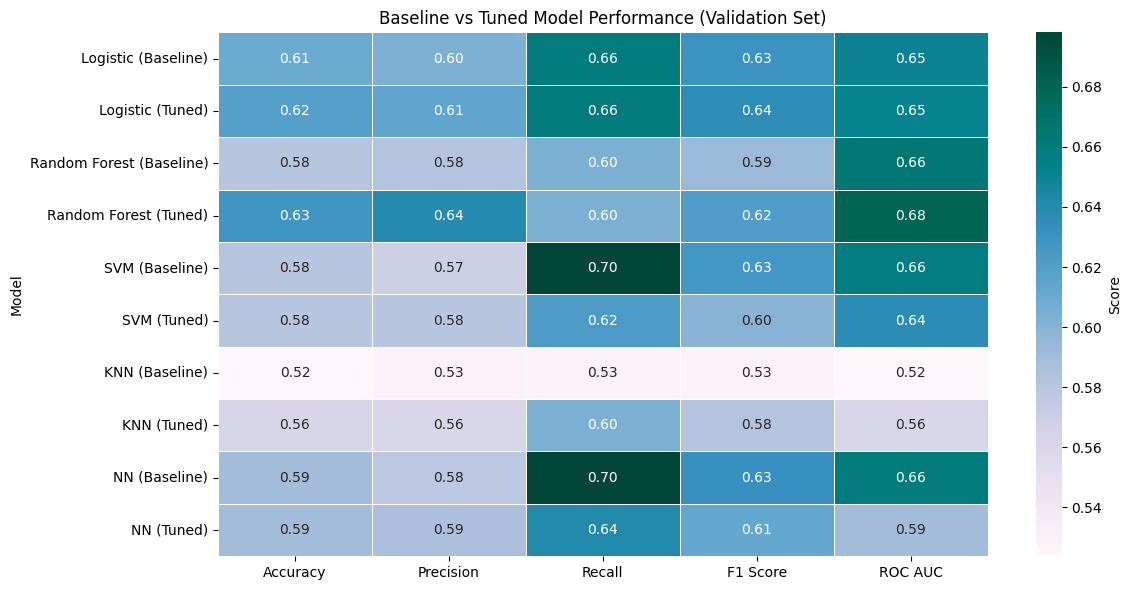

In [178]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=0.5, cbar_kws={'label': 'Score'})
plt.title("Baseline vs Tuned Model Performance (Validation Set)")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Evaluation of Model Performance

The heatmap compares baseline and tuned versions of five classification algorithms — Logistic Regression, Random Forest, SVM, KNN, and Neural Networks — across key performance metrics: **Accuracy**, **Precision**, **Recall**, **F1 Score**, and **ROC AUC**.

### Key Takeaways by Model

| Model | Key Strengths | Key Weaknesses |
|-------|----------------|----------------|
| **Random Forest (Tuned)** | Highest accuracy (**0.63**), precision (**0.64**), and ROC AUC (**0.68**). Strong all-round performance. | Slightly lower recall (**0.60**) – may miss some positive cases. |
| **Logistic Regression (Tuned)** | Balanced metrics with ROC AUC of **0.65**. Interpretable and stable. | Modest improvement from baseline, lower recall (**0.66**). |
| **SVM (Baseline)** | Highest recall (**0.70**) – good at identifying high-occupancy listings. | Low precision (**0.57**) and accuracy (**0.58**) – high false positive rate. |
| **KNN (Both)** | Poor across all metrics (accuracy ≤ **0.56**, ROC AUC ≤ **0.56**). | Likely unable to capture complex patterns in data. |
| **Neural Network (Tuned)** | Improved recall (**0.64**) and F1 score (**0.61**). | Weaker ROC AUC (**0.59**) – struggles to rank predictions effectively. |

---

## Recommended Model: Random Forest (Tuned)

### Why?

- **Best overall performance**: Random Forest (Tuned) achieved the top scores in **accuracy**, **precision**, and **ROC AUC**, making it the most balanced and effective model across all metrics.
- **Robust generalisation**: The improvements from baseline to tuned version suggest the model generalises well on unseen data.
- **Flexibility**: Handles mixed data types (numeric and categorical) and is robust to outliers and multicollinearity.
- **Business utility**: Prioritises **correct identification of high-occupancy properties**, which is crucial for informing **investment decisions**, **revenue projections**, and **listing strategy**.

---


While the Random Forest model performs best overall, its **accuracy of 63%** and **ROC AUC of 0.68** indicate **moderate predictive strength**:

- The model should be used as a **decision-support tool**, not a definitive solution.
- Predictions must be **validated with domain knowledge** before acting on them.
- **Further improvements** are possible via:
  - Additional feature engineering (e.g., seasonality, proximity to amenities)
  - Access to larger or more recent datasets
  - Use of ensemble or hybrid models
  - Advanced hyperparameter tuning (e.g., Bayesian search)

---

## Business Insight

The primary objective of this project is to assist a serviced accommodation business in identifying **properties likely to achieve high occupancy rates** — a key determinant of profitability.

The tuned Random Forest model provides:

- A **scalable, data-driven tool** to assist in evaluating and ranking potential property investments.
- An improvement over simple heuristics (e.g., based on location or price alone).
- A framework that can evolve and improve as more data becomes available.

> **Caution**: With only moderate accuracy, results should be interpreted as **probabilistic indicators**, not absolute truths. Risk assessments and operational context must complement model outputs.

---


### **7.2. Confusion Matrix**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


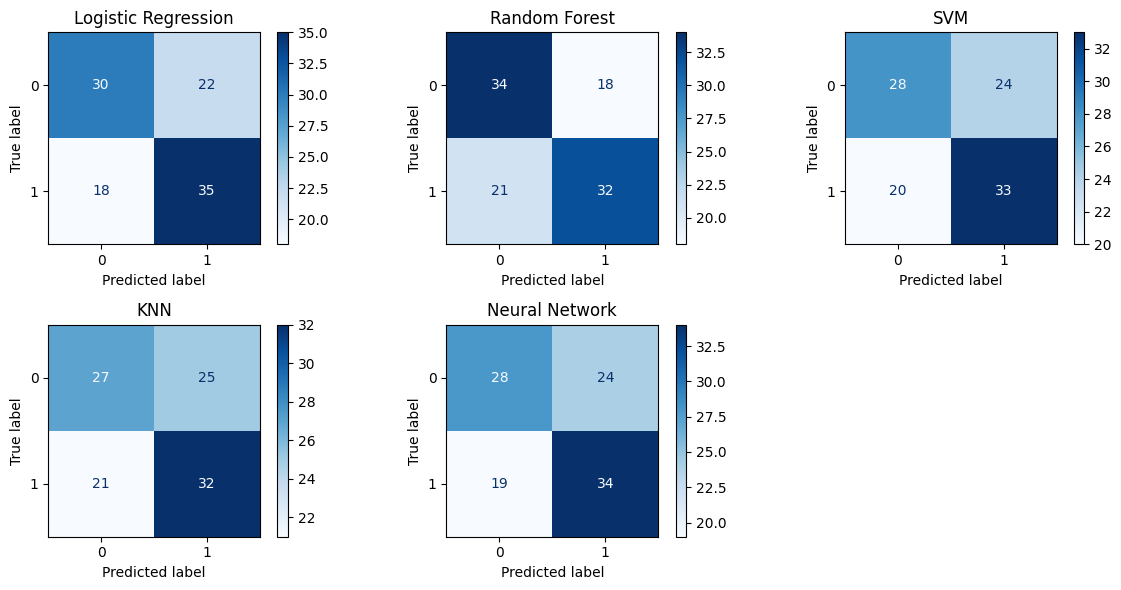

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions (thresholded for NN)
nn_preds = (best_nn.predict(X_val) > 0.5).astype("int32")

# Set up figure
fig, axes = plt.subplots(2, 3, figsize=(12, 6))  # 2 rows, 3 columns
axes = axes.flatten()
fig.delaxes(axes[-1])

# Models and predictions
models = {
    "Logistic Regression": best_logreg_preds,
    "Random Forest": best_rf_preds,
    "SVM": best_svm_preds,
    "KNN": best_knn_preds,
    "Neural Network": nn_preds
}

# Plot each confusion matrix
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.show()

## Confusion Matrix Analysis

The confusion matrices provide a breakdown of prediction performance by class (0 = Low Occupancy, 1 = High Occupancy) across the five tested models. Each matrix illustrates the count of:

- **True Lows**: Correctly predicted low occupancy (0 → 0)
- **False Highs**: Incorrectly predicted high occupancy (0 → 1)
- **False Lows**: Incorrectly predicted low occupancy (1 → 0)
- **True Highs**: Correctly predicted high occupancy (1 → 1)

---

### Confusion Matrix Summary

| Model                | True Lows (0→0) | False Highs (0→1) | False Lows (1→0) | True Highs (1→1) |
|----------------------|----------------|--------------------|-------------------|------------------|
| Logistic Regression  | 30             | 22                 | 18                | 35               |
| Random Forest        | 34             | 18                 | 21                | 32               |
| SVM                  | 28             | 24                 | 20                | 33               |
| KNN                  | 27             | 25                 | 21                | 32               |
| Neural Network       | 28             | 24                 | 19                | 34               |

---

## 🔍 Insights by Model

- **Random Forest**: Achieved the best balance with the **fewest false highs (18)** while maintaining strong **true highs (32)**. This means it reliably detects both high- and low-occupancy listings with fewer risky misclassifications.

- **Logistic Regression**: Had the **highest number of true highs (35)**, indicating strong detection of valuable listings. However, it also suffered from **relatively high false highs (22)**, potentially suggesting properties are profitable when they are not, which can have serious financial implications.

- **Neural Network**: Closely matches Logistic Regression, with a slightly more balanced trade-off between false and true highs/lows.

- **SVM and KNN**: Both models had the **highest number of false highs and false lows**, reflecting **less reliable predictions** and a riskier output pattern for business application.

---

## Business Implications

In the context of serviced accommodation investment, **false highs are particularly risky**: they may lead to acquisition of low-performing properties under the false belief they will perform well.

**Random Forest (Tuned)** emerges as the strongest model due to:
- High true high prediction with low false highs
- A cautious approach that reduces investment risk
- Balanced performance across both occupancy classes

It offers **actionable insights** for identifying consistently high-performing properties in Essex, aligning directly with the business’s strategic goal: **targeting high-yield listings with minimal risk**.

---

## Conclusion

This confusion matrix analysis supports our earlier metric evaluation and provides strong evidence for model selection:

> 🔹 **Recommended Model**: **Random Forest (Tuned)** — for its robust, business-aligned classification performance with a low risk of false positives.

### **7.3. Precision-Recall Curves**

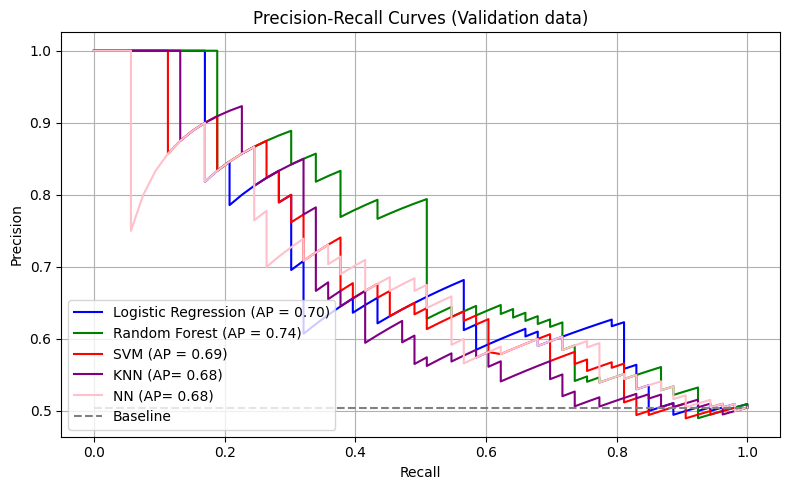

In [192]:
# Get precision-recall values for each model
precision_logreg, recall_logreg, _ = precision_recall_curve(y_val, best_logreg_prob)
precision_rf, recall_rf, _ = precision_recall_curve(y_val, best_rf_prob)
precision_svm, recall_svm, _ = precision_recall_curve(y_val, best_svm_prob)
precision_knn, recall_knn,_ = precision_recall_curve(y_val, best_knn_prob)
precision_nn, recall_nn,_ = precision_recall_curve(y_val, best_nn_prob)

# Calculate average precision score (area under the PR curve)
ap_logreg = average_precision_score(y_val, best_logreg_prob)
ap_rf = average_precision_score(y_val, best_rf_prob)
ap_svm = average_precision_score(y_val, best_svm_prob)
ap_knn = average_precision_score(y_val,best_knn_prob)
ap_nn = average_precision_score(y_val,best_nn_prob)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(recall_logreg, precision_logreg, label=f'Logistic Regression (AP = {ap_logreg:.2f})', color='blue')
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})', color='green')
plt.plot(recall_svm, precision_svm, label=f'SVM (AP = {ap_svm:.2f})', color='red')
plt.plot(recall_knn, precision_knn, label=f'KNN (AP= {ap_knn:.2f})', color='purple')
plt.plot(recall_nn, precision_nn, label=f'NN (AP= {ap_nn:.2f})', color='pink')



# Reference line (average prevalence)
baseline = sum(y_val) / len(y_val)
plt.hlines(baseline, xmin=0, xmax=1, colors='gray', linestyles='--', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves (Validation data)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

## 📈 Precision-Recall Curve Analysis (Validation Data)

The Precision-Recall (PR) curve visualizes the trade-off between precision and recall for different classification thresholds. It is particularly useful in imbalanced classification tasks, such as occupancy classification, where the cost of misclassification is high.

### 🔍 Average Precision (AP) Scores

| Model                | Average Precision (AP) |
|----------------------|-------------------------|
| 🔝 Random Forest      | **0.74**                |
| Logistic Regression  | 0.70                    |
| SVM                  | 0.69                    |
| KNN                  | 0.68                    |
| Neural Network       | 0.68                    |
| Baseline             | 0.50                    |

---

### 📊 Interpretation

- **Random Forest** demonstrates the **highest average precision (0.74)**, outperforming all other models across the full range of recall values. This indicates that it consistently maintains a strong ability to identify **true high occupancy listings**, while minimizing false positives.

- **Logistic Regression** also performs well with an AP of 0.70, suggesting a reliable ability to balance precision and recall. However, it slightly trails Random Forest in higher recall ranges.

- **SVM, KNN, and Neural Network** exhibit lower AP scores (0.68–0.69), with performance dropping faster as recall increases. This indicates that these models may struggle to maintain precision when aiming to capture more high-occupancy listings.

- The **baseline (0.5)** represents random guessing — all models significantly outperform this threshold, validating the robustness of the predictive pipeline.

---

### 💼 Business Implications

In the context of serviced accommodation:

- **High Precision** means fewer low-performing properties are incorrectly classified as high-performing — reducing costly misinvestments.
- **High Recall** ensures that the business does not miss many genuinely high-occupancy properties — maximizing revenue opportunities.

Given this, **Random Forest** offers the best combination of both:

> ✅ **Recommended Model: Random Forest (Tuned)**  
> Due to its superior ability to **accurately and consistently identify high-performing listings**, it aligns best with the business objective:  
> **Maximize returns while minimizing acquisition risk**.

---

### ✅ Final Verdict

Based on this PR curve analysis and earlier model comparisons:

- **Random Forest remains the most reliable and robust choice**.
- Its high AP, favorable confusion matrix, and strong heatmap metrics confirm its suitability for deployment in predicting high-occupancy properties for investment.


###**7.4. ROC AUC Scores**

In [181]:
#  Compare ROC AUC
print("\nROC AUC Scores:")
print("Logistic Regression", roc_auc_score(y_val, best_logreg_prob))
print("Random Forest:", roc_auc_score(y_val, best_rf_prob))
print("SVM:", roc_auc_score(y_val, best_svm_prob))
print("KNN", roc_auc_score(y_val, best_knn_prob))
print("NN", roc_auc_score(y_val, best_nn_prob))


ROC AUC Scores:
Logistic Regression 0.6523947750362845
Random Forest: 0.6799709724238027
SVM: 0.6369738751814222
KNN 0.6095791001451378
NN 0.6473149492017418


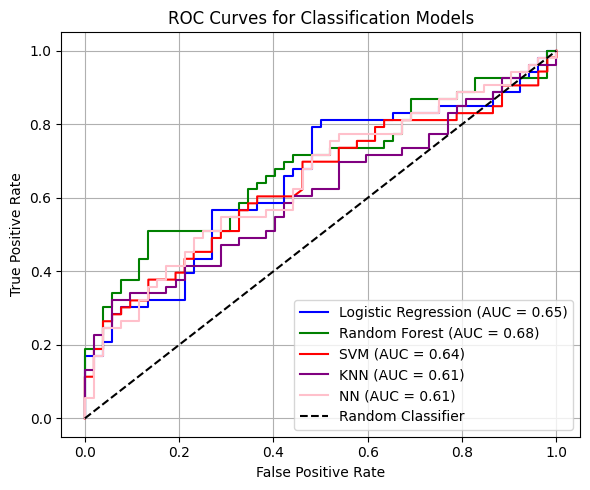

In [182]:

# Get ROC curve values for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_val, best_logreg_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_val, best_rf_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_val, best_svm_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_val, best_knn_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_val, best_nn_prob)

auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_svm = auc(fpr_svm, tpr_svm)
auc_knn = auc(fpr_knn, tpr_knn)
auc_nn = auc(fpr_nn, tpr_nn)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='red')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='purple')
plt.plot(fpr_nn, tpr_nn, label=f'NN (AUC = {auc_knn:.2f})', color='pink')


# Reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

####**ROC Curve Analysis**
Overall the Random Forest performed the best overall with the **highest AUC of 0.68.**


KNN underperformed in comparison with the curve closest to the baseline, indicating poorer discrimination. Both KNN and Neural Networks had the lowest AUC score at 0.61.

####**Business Interpretation**

Random Forest model (tuned)  gives the highest confidence in correctly separating high vs. low occupancy properties.



### **7.5. Cross-validation of chosen model**

In [184]:

# Create pipeline to standardize features and fit model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', best_rf)
])

# Set up stratified k-fold (stratified maintains class balance)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate cross-validation scores with ROC AUC
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='roc_auc')

# Print the scores
print("Cross-Validated ROC AUC Scores:", cv_scores)
print("Mean ROC AUC:", np.mean(cv_scores).round(3))
print("Standard Deviation:", np.std(cv_scores).round(3))

Cross-Validated ROC AUC Scores: [0.67170868 0.69803922 0.66792717 0.69373583 0.6919915 ]
Mean ROC AUC: 0.685
Standard Deviation: 0.012


#### **Model Validation via K-Fold Cross-Validation**

Moderate performance:

An ROC AUC of 0.685 suggests that the model is better than random guessing (which would be 0.5), but still has room for improvement. There is little variability in the scores across folds, indicating that the model performs consistently on different subsets of the data. This consistency lends confidence in the model's generalisability to unseen data. IT also suggests that the model is not overfitting and likely to perform reliably  on future data.




Depending on the business context, this level of performance may be acceptable for an initial deployment — particularly when used as a decision-support tool in combination with other business insights. However, for mission-critical decisions or where precision is paramount, further feature engineering or model refinement may be warranted.

### **7.6 Feature Importance**

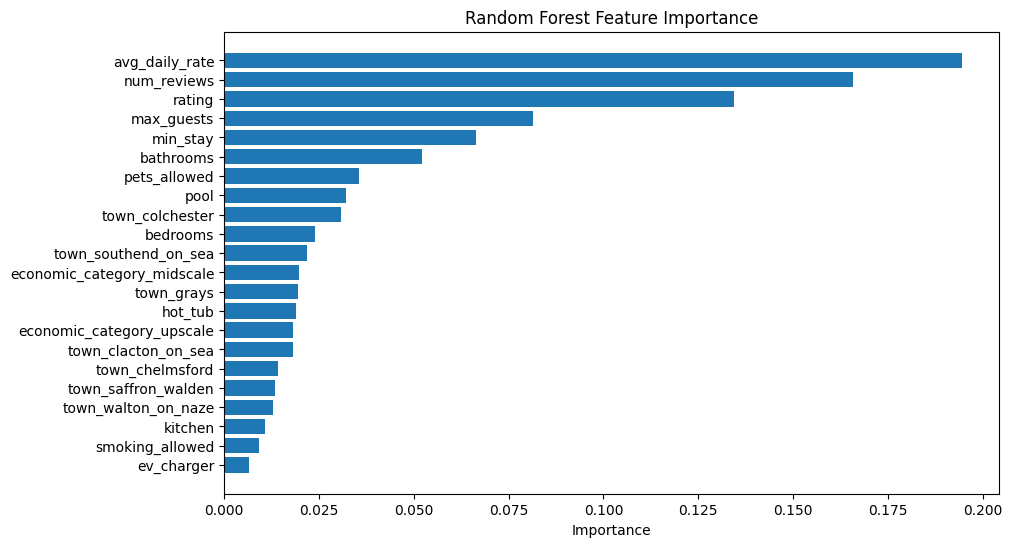

In [197]:

importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.show()

##**8. Testing the Model**

In [185]:
# training the best fit model on the train data
best_rf = rf_tuned.best_estimator_
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=153,
                       random_state=42)

In [196]:
# implementing the model on the test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]  # For ROC AUC

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.59      0.68      0.63        53
           1       0.62      0.53      0.57        53

    accuracy                           0.60       106
   macro avg       0.61      0.60      0.60       106
weighted avg       0.61      0.60      0.60       106

Test ROC AUC: 0.6667853328586686


### **Random Forest Model Evaluation on Test Set**

After selecting Random Forest as the final model, its performance was assessed on unseen test data. Below are the key evaluation metrics:

#### **Classification Report:**

| Metric        | Class 0 (Low) | Class 1 (High) |
|---------------|---------------|----------------|
| Precision     | 0.59          | 0.62           |
| Recall        | 0.68          | 0.53           |
| F1-Score      | 0.63          | 0.57           |
| Support       | 53            | 53             |

- **Accuracy:** 60%  
- **Macro Avg F1-Score:** 0.60  
- **ROC AUC:** 0.667  

#### **Interpretation:**

- The model performs slightly better in identifying **low-occupancy properties** (class 0) with higher recall.
- Precision for high-occupancy listings (class 1) is slightly better than recall, indicating some **false positives**—properties predicted as high occupancy that are actually low.
- The **balanced F1-scores** for both classes (0.63 and 0.57) suggest a modest ability to handle class imbalance and generalise across classes.
- An **ROC AUC of 0.667** indicates that the model has moderate discriminative power—better than random guessing (0.5), but not highly robust.

#### **Business Implications:**

From a business perspective, the ability to correctly identify **high-performing properties (class 1)** is critical. While the model does not yet achieve high recall for these, it shows enough promise to support **early-stage investment screening**, especially if used in conjunction with human review or further filtering.

Further refinement (e.g., through feature engineering, ensemble methods, or incorporating more property-level data) could strengthen the model’s predictive performance in future iterations.


## **9. Save Model For Use**

In [188]:
import joblib

joblib.dump(best_rf, "rf_model_tuned.joblib")

['rf_model_tuned.joblib']

In [189]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

## **10. Final Conclusions and Business Recommendations**

### Project Objective Recap
The goal of this project was to develop a machine learning model to classify serviced accommodation properties in Essex into high or low occupancy groups. The aim was to assist a short-term lettings business in identifying high-performing properties to guide investment and operational decisions.

---

###  Summary of Key Findings

- **Random Forest (Tuned)** emerged as the most effective model:
  - **Test Accuracy:** 60%
  - **ROC AUC:** 0.667
  - **Balanced F1-scores** across both classes
  - **Precision for High Occupancy:** 0.62
  - **Recall for High Occupancy:** 0.53

- The model showed **moderate discriminatory power**, performing better than random guessing, and exhibited **consistent results** across cross-validation folds.

- **Confusion matrix analysis** revealed that the model is conservative in predicting high occupancy (fewer false positives), which is beneficial in a business context to avoid overestimating property potential.

- The **Precision-Recall curve** further confirmed Random Forest’s strength in identifying high-occupancy properties while minimizing misclassification risk.

---

### Business Recommendations

1. **Use Random Forest model as a decision-support tool**, not a sole authority. Its predictions should complement expert judgment, especially when making high-stakes investment decisions.

2. **Focus on high-confidence predictions**: Properties flagged with high probability of occupancy should be prioritised for further manual due diligence and site analysis.

3. **Leverage model outputs to streamline property shortlisting**, saving time and improving consistency in evaluating new or existing listings.

4. **Monitor model performance regularly** as new data becomes available, ensuring that it continues to reflect market dynamics and business needs.

---

### Future Analysis & Modelling Recommendations

1. **Expand Dataset and Enhance Feature set**:
   - Add location-specific data (e.g., proximity to transport, attractions)
   - Incorporate seasonality or temporal booking trends
   - Expand dataset (increase sampling) by incorporate data from additional time periods and other geographic regions beyond Essex for broader generalisabiliy and more robust predictions.
   

2. **Explore Advanced Modelling**:
   - Gradient boosting (e.g., XGBoost or LightGBM)
   - Ensemble voting models combining Logistic Regression and Random Forest
   - Deep learning with engineered features

3. **Deploy Model in a Live System**:
   - Integrate into a dashboard or decision-support app using FastAPI, Streamlit, or a BI tool.

---

### ✅ Final Verdict

The tuned Random Forest model provides a solid foundation for **data-driven property selection**. While not flawless, its balance between predictive power and interpretability makes it a **practical asset for scaling property evaluations**, reducing risk, and guiding strategic decisions in the short-term rental market.